Obesity_Adults

In [242]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import pycountry
import numpy as np

ob_adult_url = "https://ghoapi.azureedge.net/api/NCD_BMI_30C"

result = requests.get(ob_adult_url)
data = result.json()

In [244]:
data

{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#NCD_BMI_30C',
 'value': [{'Id': 8355021,
   'IndicatorCode': 'NCD_BMI_30C',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'SLE',
   'TimeDimType': 'YEAR',
   'ParentLocationCode': 'AFR',
   'ParentLocation': 'Africa',
   'Dim1Type': 'SEX',
   'TimeDim': 2006,
   'Dim1': 'SEX_BTSX',
   'Dim2Type': 'AGEGROUP',
   'Dim2': 'AGEGROUP_YEARS18-PLUS',
   'Dim3Type': None,
   'Dim3': None,
   'DataSourceDimType': None,
   'DataSourceDim': None,
   'Value': '4.6 [3.9-5.4]',
   'NumericValue': 4.62846,
   'Low': 3.92531,
   'High': 5.4003,
   'Comments': None,
   'Date': '2024-02-29T16:06:41.017+01:00',
   'TimeDimensionValue': '2006',
   'TimeDimensionBegin': '2006-01-01T00:00:00+01:00',
   'TimeDimensionEnd': '2006-12-31T00:00:00+01:00'},
  {'Id': 8355510,
   'IndicatorCode': 'NCD_BMI_30C',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'COL',
   'TimeDimType': 'YEAR',
   'ParentLocationCode': 'AMR',
   'ParentLocation': 'Ameri

In [246]:
data.keys()            # data have 3 keys

dict_keys(['@odata.context', 'value'])

In [248]:
ob_adult = data['value']          # fetch required data # Obesity among adults (BMI ≥ 30)

In [250]:
len(ob_adult)          # Count of data = 20790

20790

In [252]:
df_OBA = pd.DataFrame(ob_adult)

In [254]:
df_OBA.head()

Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  8355021   NCD_BMI_30C        COUNTRY        SLE        YEAR   
1  8355510   NCD_BMI_30C        COUNTRY        COL        YEAR   
2  8355581   NCD_BMI_30C         REGION        EUR        YEAR   
3      257   NCD_BMI_30C        COUNTRY        KHM        YEAR   
4      350   NCD_BMI_30C        COUNTRY        IRN        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim      Dim1  ...  \
0                AFR                 Africa      SEX     2006  SEX_BTSX  ...   
1                AMR               Americas      SEX     1994  SEX_BTSX  ...   
2               None                   None      SEX     1996  SEX_BTSX  ...   
3                WPR        Western Pacific      SEX     2001  SEX_BTSX  ...   
4                EMR  Eastern Mediterranean      SEX     2020   SEX_MLE  ...   

  DataSourceDim             Value NumericValue       Low      High Comments  \
0          None     4.6 [3.9-5.4]      4.62846   3.92531   5.40030     None   
1          None     8.0 [6.9-9.2]      8.00311   6.86552   9.21506     None   
2          None  16.3 [15.9-16.7]     16.29156  15.91687  16.68072     None   
3          None     1.0 [0.8-1.3]      0.98170   0.75674   1.27487     None   
4          None  17.5 [15.8-19.2]     17.48764  15.79378  19.24573     None   

                            Date  TimeDimensionValue  \
0  2024-02-29T16:06:41.017+01:00                2006   
1  2024-02-29T16:06:41.017+01:00                1994   
2  2024-05-23T13:35:20.483+02:00                1996   
3  2024-02-29T16:06:41.017+01:00                2001   
4  2024-02-29T16:06:41.017+01:00                2020   

          TimeDimensionBegin           TimeDimensionEnd  
0  2006-01-01T00:00:00+01:00  2006-12-31T00:00:00+01:00  
1  1994-01-01T00:00:00+01:00  1994-12-31T00:00:00+01:00  
2  1996-01-01T00:00:00+01:00  1996-12-31T00:00:00+01:00  
3  2001-01-01T00:00:00+01:00  2001-12-31T00:00:00+01:00  
4  2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00  

[5 rows x 25 columns]

In [256]:
df_OBA['age_group'] = "Adults"

In [258]:
df_OBA

Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0      8355021   NCD_BMI_30C        COUNTRY        SLE        YEAR   
1      8355510   NCD_BMI_30C        COUNTRY        COL        YEAR   
2      8355581   NCD_BMI_30C         REGION        EUR        YEAR   
3          257   NCD_BMI_30C        COUNTRY        KHM        YEAR   
4          350   NCD_BMI_30C        COUNTRY        IRN        YEAR   
...        ...           ...            ...        ...         ...   
20785  9761560   NCD_BMI_30C        COUNTRY        LTU        YEAR   
20786  9762241   NCD_BMI_30C        COUNTRY        ARM        YEAR   
20787  9763578   NCD_BMI_30C        COUNTRY        ERI        YEAR   
20788  9763685   NCD_BMI_30C        COUNTRY        VCT        YEAR   
20789  9763772   NCD_BMI_30C        COUNTRY        TUN        YEAR   

      ParentLocationCode         ParentLocation Dim1Type  TimeDim      Dim1  \
0                    AFR                 Africa      SEX     2006  SEX_BTSX   
1                    AMR               Americas      SEX     1994  SEX_BTSX   
2                   None                   None      SEX     1996  SEX_BTSX   
3                    WPR        Western Pacific      SEX     2001  SEX_BTSX   
4                    EMR  Eastern Mediterranean      SEX     2020   SEX_MLE   
...                  ...                    ...      ...      ...       ...   
20785                EUR                 Europe      SEX     2013  SEX_BTSX   
20786                EUR                 Europe      SEX     1997  SEX_BTSX   
20787                AFR                 Africa      SEX     2011   SEX_MLE   
20788                AMR               Americas      SEX     2003   SEX_MLE   
20789                EMR  Eastern Mediterranean      SEX     2007  SEX_BTSX   

       ...             Value NumericValue       Low      High Comments  \
0      ...     4.6 [3.9-5.4]      4.62846   3.92531   5.40030     None   
1      ...     8.0 [6.9-9.2]      8.00311   6.86552   9.21506     None   
2      ...  16.3 [15.9-16.7]     16.29156  15.91687  16.68072     None   
3      ...     1.0 [0.8-1.3]      0.98170   0.75674   1.27487     None   
4      ...  17.5 [15.8-19.2]     17.48764  15.79378  19.24573     None   
...    ...               ...          ...       ...       ...      ...   
20785  ...  27.4 [24.0-30.9]     27.39776  24.04407  30.89829     None   
20786  ...  14.0 [12.1-15.9]     13.95061  12.09827  15.93363     None   
20787  ...     1.2 [0.8-1.8]      1.20233   0.76718   1.78496     None   
20788  ...   10.2 [7.1-14.0]     10.20733   7.09326  13.98207     None   
20789  ...  18.6 [17.0-20.3]     18.63924  17.02105  20.30582     None   

                                Date TimeDimensionValue  \
0      2024-02-29T16:06:41.017+01:00               2006   
1      2024-02-29T16:06:41.017+01:00               1994   
2      2024-05-23T13:35:20.483+02:00               1996   
3      2024-02-29T16:06:41.017+01:00               2001   
4      2024-02-29T16:06:41.017+01:00               2020   
...                              ...                ...   
20785  2024-02-29T16:06:41.017+01:00               2013   
20786  2024-02-29T16:06:41.017+01:00               1997   
20787  2024-02-29T16:06:41.017+01:00               2011   
20788  2024-02-29T16:06:41.017+01:00               2003   
20789  2024-02-29T16:06:41.017+01:00               2007   

              TimeDimensionBegin           TimeDimensionEnd  age_group  
0      2006-01-01T00:00:00+01:00  2006-12-31T00:00:00+01:00     Adults  
1      1994-01-01T00:00:00+01:00  1994-12-31T00:00:00+01:00     Adults  
2      1996-01-01T00:00:00+01:00  1996-12-31T00:00:00+01:00     Adults  
3      2001-01-01T00:00:00+01:00  2001-12-31T00:00:00+01:00     Adults  
4      2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00     Adults  
...                          ...                        ...        ...  
20785  2013-01-01T00:00:00+01:00  2013-12-31T00:00:00+01:00     Adults  
20786  1997-01-01T00:00:00+01:00  1997-1

# Obesity_children 


In [260]:
ob_child_url = "https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C"

result = requests.get(ob_child_url)
data = result.json()

In [262]:
data

{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#NCD_BMI_PLUS2C',
 'value': [{'Id': 8355193,
   'IndicatorCode': 'NCD_BMI_PLUS2C',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'BEL',
   'TimeDimType': 'YEAR',
   'ParentLocationCode': 'EUR',
   'ParentLocation': 'Europe',
   'Dim1Type': 'SEX',
   'Dim1': 'SEX_FMLE',
   'TimeDim': 2006,
   'Dim2Type': 'AGEGROUP',
   'Dim2': 'AGEGROUP_YEARS05-19',
   'Dim3Type': None,
   'Dim3': None,
   'DataSourceDimType': None,
   'DataSourceDim': None,
   'Value': '5.2 [3.7-7.0]',
   'NumericValue': 5.19709,
   'Low': 3.74283,
   'High': 6.96113,
   'Comments': None,
   'Date': '2024-02-29T16:06:41.017+01:00',
   'TimeDimensionValue': '2006',
   'TimeDimensionBegin': '2006-01-01T00:00:00+01:00',
   'TimeDimensionEnd': '2006-12-31T00:00:00+01:00'},
  {'Id': 8355334,
   'IndicatorCode': 'NCD_BMI_PLUS2C',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'SLV',
   'TimeDimType': 'YEAR',
   'ParentLocationCode': 'AMR',
   'ParentLocation'

In [264]:
data.keys()

dict_keys(['@odata.context', 'value'])

In [266]:
ob_child = data['value']

In [268]:
len(ob_adult)

20790

In [270]:
df_OBC = pd.DataFrame(ob_child)

In [272]:
df_OBC.head()

Id   IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  8355193  NCD_BMI_PLUS2C        COUNTRY        BEL        YEAR   
1  8355334  NCD_BMI_PLUS2C        COUNTRY        SLV        YEAR   
2  8355353  NCD_BMI_PLUS2C        COUNTRY        MRT        YEAR   
3  8355369  NCD_BMI_PLUS2C        COUNTRY        ZMB        YEAR   
4  8355633  NCD_BMI_PLUS2C        COUNTRY        SWE        YEAR   

  ParentLocationCode ParentLocation Dim1Type      Dim1  TimeDim  ...  \
0                EUR         Europe      SEX  SEX_FMLE     2006  ...   
1                AMR       Americas      SEX  SEX_FMLE     2004  ...   
2                AFR         Africa      SEX  SEX_FMLE     2013  ...   
3                AFR         Africa      SEX  SEX_FMLE     2017  ...   
4                EUR         Europe      SEX  SEX_FMLE     2019  ...   

  DataSourceDim           Value NumericValue      Low      High Comments  \
0          None   5.2 [3.7-7.0]      5.19709  3.74283   6.96113     None   
1          None  8.4 [6.0-11.3]      8.41335  5.97726  11.28877     None   
2          None  7.1 [2.0-15.9]      7.10311  2.02821  15.93248     None   
3          None   3.5 [1.6-6.7]      3.49892  1.59579   6.66726     None   
4          None   6.9 [4.8-9.2]      6.85936  4.77926   9.23313     None   

                            Date  TimeDimensionValue  \
0  2024-02-29T16:06:41.017+01:00                2006   
1  2024-02-29T16:06:41.017+01:00                2004   
2  2024-02-29T16:06:41.017+01:00                2013   
3  2024-02-29T16:06:41.017+01:00                2017   
4  2024-02-29T16:06:41.017+01:00                2019   

          TimeDimensionBegin           TimeDimensionEnd  
0  2006-01-01T00:00:00+01:00  2006-12-31T00:00:00+01:00  
1  2004-01-01T00:00:00+01:00  2004-12-31T00:00:00+01:00  
2  2013-01-01T00:00:00+01:00  2013-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2019-01-01T00:00:00+01:00  2019-12-31T00:00:00+01:00  

[5 rows x 25 columns]

In [274]:
df_OBC["age_group"] = "Children"

In [276]:
df_OBC

Id   IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0      8355193  NCD_BMI_PLUS2C        COUNTRY        BEL        YEAR   
1      8355334  NCD_BMI_PLUS2C        COUNTRY        SLV        YEAR   
2      8355353  NCD_BMI_PLUS2C        COUNTRY        MRT        YEAR   
3      8355369  NCD_BMI_PLUS2C        COUNTRY        ZMB        YEAR   
4      8355633  NCD_BMI_PLUS2C        COUNTRY        SWE        YEAR   
...        ...             ...            ...        ...         ...   
62365  9763382  NCD_BMI_PLUS2C        COUNTRY        BEL        YEAR   
62366  9763615  NCD_BMI_PLUS2C        COUNTRY        SDN        YEAR   
62367  9763948  NCD_BMI_PLUS2C        COUNTRY        CPV        YEAR   
62368  9763982  NCD_BMI_PLUS2C        COUNTRY        STP        YEAR   
62369  9764214  NCD_BMI_PLUS2C        COUNTRY        BGD        YEAR   

      ParentLocationCode         ParentLocation Dim1Type      Dim1  TimeDim  \
0                    EUR                 Europe      SEX  SEX_FMLE     2006   
1                    AMR               Americas      SEX  SEX_FMLE     2004   
2                    AFR                 Africa      SEX  SEX_FMLE     2013   
3                    AFR                 Africa      SEX  SEX_FMLE     2017   
4                    EUR                 Europe      SEX  SEX_FMLE     2019   
...                  ...                    ...      ...       ...      ...   
62365                EUR                 Europe      SEX  SEX_BTSX     1997   
62366                EMR  Eastern Mediterranean      SEX  SEX_BTSX     2006   
62367                AFR                 Africa      SEX  SEX_BTSX     2000   
62368                AFR                 Africa      SEX   SEX_MLE     2005   
62369               SEAR        South-East Asia      SEX   SEX_MLE     2006   

       ...           Value NumericValue      Low      High Comments  \
0      ...   5.2 [3.7-7.0]      5.19709  3.74283   6.96113     None   
1      ...  8.4 [6.0-11.3]      8.41335  5.97726  11.28877     None   
2      ...  7.1 [2.0-15.9]      7.10311  2.02821  15.93248     None   
3      ...   3.5 [1.6-6.7]      3.49892  1.59579   6.66726     None   
4      ...   6.9 [4.8-9.2]      6.85936  4.77926   9.23313     None   
...    ...             ...          ...      ...       ...      ...   
62365  ...   5.1 [3.4-7.0]      5.05149  3.43740   7.00625     None   
62366  ...   1.7 [0.7-3.4]      1.71509  0.69364   3.38516     None   
62367  ...   1.8 [0.4-5.0]      1.84242  0.35935   5.00420     None   
62368  ...  4.7 [0.9-12.3]      4.68102  0.92881  12.27006     None   
62369  ...   0.8 [0.1-2.2]      0.76168  0.14542   2.18712     None   

                                Date TimeDimensionValue  \
0      2024-02-29T16:06:41.017+01:00               2006   
1      2024-02-29T16:06:41.017+01:00               2004   
2      2024-02-29T16:06:41.017+01:00               2013   
3      2024-02-29T16:06:41.017+01:00               2017   
4      2024-02-29T16:06:41.017+01:00               2019   
...                              ...                ...   
62365  2024-02-29T16:06:41.017+01:00               1997   
62366  2024-02-29T16:06:41.017+01:00               2006   
62367  2024-02-29T16:06:41.017+01:00               2000   
62368  2024-02-29T16:06:41.017+01:00               2005   
62369  2024-02-29T16:06:41.017+01:00               2006   

              TimeDimensionBegin           TimeDimensionEnd  age_group  
0      2006-01-01T00:00:00+01:00  2006-12-31T00:00:00+01:00   Children  
1      2004-01-01T00:00:00+01:00  2004-12-31T00:00:00+01:00   Children  
2      2013-01-01T00:00:00+01:00  2013-12-31T00:00:00+01:00   Children  
3      2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00   Children  
4      2019-01-01T00:00:00+01:00  2019-12-31T00:00:00+01:00   Children  
...                          ...                        ...        ...  
62365  1997-01-01T00:00:00+01:00  1997-12-31T00:00:00+01:00   Children  
62366  2006-01-01T00:00:00+01:00  2006-12-31T00:00:0

# Malnutrition_Adult

In [278]:
ml_adult_url = "https://ghoapi.azureedge.net/api/NCD_BMI_18C"
result = requests.get(ml_adult_url)
data = result.json()

In [280]:
data

{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#NCD_BMI_18C',
 'value': [{'Id': 8355212,
   'IndicatorCode': 'NCD_BMI_18C',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'VCT',
   'TimeDimType': 'YEAR',
   'ParentLocationCode': 'AMR',
   'ParentLocation': 'Americas',
   'Dim1Type': 'SEX',
   'TimeDim': 2007,
   'Dim1': 'SEX_MLE',
   'Dim2Type': 'AGEGROUP',
   'Dim2': 'AGEGROUP_YEARS18-PLUS',
   'Dim3Type': None,
   'Dim3': None,
   'DataSourceDimType': None,
   'DataSourceDim': None,
   'Value': '4.7 [2.5-7.6]',
   'NumericValue': 4.67498,
   'Low': 2.47642,
   'High': 7.62138,
   'Comments': None,
   'Date': '2024-02-29T16:06:41.017+01:00',
   'TimeDimensionValue': '2007',
   'TimeDimensionBegin': '2007-01-01T00:00:00+01:00',
   'TimeDimensionEnd': '2007-12-31T00:00:00+01:00'},
  {'Id': 8355330,
   'IndicatorCode': 'NCD_BMI_18C',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'MDA',
   'TimeDimType': 'YEAR',
   'ParentLocationCode': 'EUR',
   'ParentLocation': 'Eur

In [282]:
data.keys()

dict_keys(['@odata.context', 'value'])

In [284]:
ml_adult = data['value']

In [286]:
df_MLA = pd.DataFrame(ml_adult)

In [288]:
len(df_MLA)

20790

In [290]:
df_MLA["age_group"] = "Adults"

In [292]:
df_MLA

Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0      8355212   NCD_BMI_18C        COUNTRY        VCT        YEAR   
1      8355330   NCD_BMI_18C        COUNTRY        MDA        YEAR   
2           53   NCD_BMI_18C        COUNTRY        GAB        YEAR   
3          405   NCD_BMI_18C        COUNTRY        TUV        YEAR   
4         1632   NCD_BMI_18C        COUNTRY        GHA        YEAR   
...        ...           ...            ...        ...         ...   
20785  9763165   NCD_BMI_18C        COUNTRY        BGR        YEAR   
20786  9763540   NCD_BMI_18C        COUNTRY        ITA        YEAR   
20787  9763803   NCD_BMI_18C        COUNTRY        PRK        YEAR   
20788  9763865   NCD_BMI_18C        COUNTRY        BMU        YEAR   
20789  9763996   NCD_BMI_18C        COUNTRY        USA        YEAR   

      ParentLocationCode   ParentLocation Dim1Type  TimeDim      Dim1  ...  \
0                    AMR         Americas      SEX     2007   SEX_MLE  ...   
1                    EUR           Europe      SEX     1990   SEX_MLE  ...   
2                    AFR           Africa      SEX     2021  SEX_FMLE  ...   
3                    WPR  Western Pacific      SEX     2001  SEX_BTSX  ...   
4                    AFR           Africa      SEX     2002   SEX_MLE  ...   
...                  ...              ...      ...      ...       ...  ...   
20785                EUR           Europe      SEX     1997   SEX_MLE  ...   
20786                EUR           Europe      SEX     1991   SEX_MLE  ...   
20787               SEAR  South-East Asia      SEX     2013  SEX_BTSX  ...   
20788                AMR         Americas      SEX     1998   SEX_MLE  ...   
20789                AMR         Americas      SEX     2007   SEX_MLE  ...   

                  Value NumericValue       Low      High Comments  \
0         4.7 [2.5-7.6]      4.67498   2.47642   7.62138     None   
1         2.1 [0.7-4.3]      2.05224   0.70394   4.34428     None   
2         5.8 [4.0-8.1]      5.79511   3.97204   8.07702     None   
3         0.9 [0.4-1.9]      0.93657   0.36515   1.85929     None   
4      13.2 [10.0-16.7]     13.20428  10.04854  16.71203     None   
...                 ...          ...       ...       ...      ...   
20785     2.2 [1.2-3.6]      2.21353   1.20464   3.57760     None   
20786     1.2 [0.9-1.6]      1.23241   0.93235   1.59651     None   
20787   12.5 [6.2-20.7]     12.46924   6.20246  20.72296     None   
20788    7.3 [2.4-15.5]      7.30252   2.36090  15.54348     None   
20789     1.0 [0.8-1.2]      0.98226   0.80044   1.18880     None   

                                Date TimeDimensionValue  \
0      2024-02-29T16:06:41.017+01:00               2007   
1      2024-02-29T16:06:41.017+01:00               1990   
2      2024-02-29T16:06:41.017+01:00               2021   
3      2024-02-29T16:06:41.017+01:00               2001   
4      2024-02-29T16:06:41.017+01:00               2002   
...                              ...                ...   
20785  2024-02-29T16:06:41.017+01:00               1997   
20786  2024-02-29T16:06:41.017+01:00               1991   
20787  2024-02-29T16:06:41.017+01:00               2013   
20788  2024-02-29T16:06:41.017+01:00               1998   
20789  2024-02-29T16:06:41.017+01:00               2007   

              TimeDimensionBegin           TimeDimensionEnd  age_group  
0      2007-01-01T00:00:00+01:00  2007-12-31T00:00:00+01:00     Adults  
1      1990-01-01T00:00:00+01:00  1990-12-31T00:00:00+01:00     Adults  
2      2021-01-01T00:00:00+01:00  2021-12-31T00:00:00+01:00     Adults  
3      2001-01-01T00:00:00+01:00  2001-12-31T00:00:00+01:00     Adults  
4      2002-01-01T00:00:00+01:00  2002-12-31T00:00:00+01:00     Adults  
...                          ...                        ...        ...  
20785  1997-01-01T00:00:00+01:00  1997-12-31T00:00:00+01:00     Adults  
20786  1991-01-01T00:00:00+01:00  1991-12-31T00:00:00+01:00     Adults  
20787  2013-01-01T00:00:00+01:00  2013-

# Malnutrition_Children

In [294]:
ml_child_url = "https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C"
result = requests.get(ml_child_url)
data = result.json()

In [296]:
data

{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#NCD_BMI_MINUS2C',
 'value': [{'Id': 8354682,
   'IndicatorCode': 'NCD_BMI_MINUS2C',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'LBR',
   'ParentLocationCode': 'AFR',
   'TimeDimType': 'YEAR',
   'ParentLocation': 'Africa',
   'Dim1Type': 'SEX',
   'Dim1': 'SEX_MLE',
   'TimeDim': 2022,
   'Dim2Type': 'AGEGROUP',
   'Dim2': 'AGEGROUP_YEARS05-19',
   'Dim3Type': None,
   'Dim3': None,
   'DataSourceDimType': None,
   'DataSourceDim': None,
   'Value': '10.1 [5.1-16.7]',
   'NumericValue': 10.05928,
   'Low': 5.1209,
   'High': 16.70115,
   'Comments': None,
   'Date': '2024-02-29T16:06:41.017+01:00',
   'TimeDimensionValue': '2022',
   'TimeDimensionBegin': '2022-01-01T00:00:00+01:00',
   'TimeDimensionEnd': '2022-12-31T00:00:00+01:00'},
  {'Id': 8355135,
   'IndicatorCode': 'NCD_BMI_MINUS2C',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'ATG',
   'ParentLocationCode': 'AMR',
   'TimeDimType': 'YEAR',
   'ParentLoca

In [298]:
data.keys()

dict_keys(['@odata.context', 'value'])

In [300]:
ml_child = data['value']

In [302]:
len(ml_child)

62370

In [304]:
df_MLC = pd.DataFrame(ml_child)

In [306]:
df_MLC.head()

Id    IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  8354682  NCD_BMI_MINUS2C        COUNTRY        LBR                AFR   
1  8355135  NCD_BMI_MINUS2C        COUNTRY        ATG                AMR   
2  8355143  NCD_BMI_MINUS2C        COUNTRY        STP                AFR   
3  8355202  NCD_BMI_MINUS2C        COUNTRY        GRD                AMR   
4  8355350  NCD_BMI_MINUS2C        COUNTRY        PAN                AMR   

  TimeDimType ParentLocation Dim1Type      Dim1  TimeDim  ... DataSourceDim  \
0        YEAR         Africa      SEX   SEX_MLE     2022  ...          None   
1        YEAR       Americas      SEX   SEX_MLE     2020  ...          None   
2        YEAR         Africa      SEX   SEX_MLE     2010  ...          None   
3        YEAR       Americas      SEX  SEX_FMLE     2019  ...          None   
4        YEAR       Americas      SEX   SEX_MLE     1995  ...          None   

             Value NumericValue      Low      High Comments  \
0  10.1 [5.1-16.7]     10.05928  5.12090  16.70115     None   
1    3.6 [0.9-8.8]      3.62031  0.85060   8.82063     None   
2   5.5 [1.7-11.8]      5.46213  1.72770  11.77777     None   
3   4.0 [0.5-12.2]      4.03798  0.51307  12.17555     None   
4    2.8 [1.5-4.5]      2.78446  1.51575   4.47044     None   

                            Date  TimeDimensionValue  \
0  2024-02-29T16:06:41.017+01:00                2022   
1  2024-02-29T16:06:41.017+01:00                2020   
2  2024-02-29T16:06:41.017+01:00                2010   
3  2024-02-29T16:06:41.017+01:00                2019   
4  2024-02-29T16:06:41.017+01:00                1995   

          TimeDimensionBegin           TimeDimensionEnd  
0  2022-01-01T00:00:00+01:00  2022-12-31T00:00:00+01:00  
1  2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00  
2  2010-01-01T00:00:00+01:00  2010-12-31T00:00:00+01:00  
3  2019-01-01T00:00:00+01:00  2019-12-31T00:00:00+01:00  
4  1995-01-01T00:00:00+01:00  1995-12-31T00:00:00+01:00  

[5 rows x 25 columns]

In [308]:
df_MLC["age_group"] = "Children"

In [310]:
df_MLC

Id    IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0      8354682  NCD_BMI_MINUS2C        COUNTRY        LBR                AFR   
1      8355135  NCD_BMI_MINUS2C        COUNTRY        ATG                AMR   
2      8355143  NCD_BMI_MINUS2C        COUNTRY        STP                AFR   
3      8355202  NCD_BMI_MINUS2C        COUNTRY        GRD                AMR   
4      8355350  NCD_BMI_MINUS2C        COUNTRY        PAN                AMR   
...        ...              ...            ...        ...                ...   
62365  9762757  NCD_BMI_MINUS2C        COUNTRY        PNG                WPR   
62366  9763052  NCD_BMI_MINUS2C        COUNTRY        WSM                WPR   
62367  9763939  NCD_BMI_MINUS2C        COUNTRY        IDN               SEAR   
62368  9764009  NCD_BMI_MINUS2C        COUNTRY        MWI                AFR   
62369  9764125  NCD_BMI_MINUS2C        COUNTRY        ISL                EUR   

      TimeDimType   ParentLocation Dim1Type      Dim1  TimeDim  ...  \
0            YEAR           Africa      SEX   SEX_MLE     2022  ...   
1            YEAR         Americas      SEX   SEX_MLE     2020  ...   
2            YEAR           Africa      SEX   SEX_MLE     2010  ...   
3            YEAR         Americas      SEX  SEX_FMLE     2019  ...   
4            YEAR         Americas      SEX   SEX_MLE     1995  ...   
...           ...              ...      ...       ...      ...  ...   
62365        YEAR  Western Pacific      SEX  SEX_FMLE     2009  ...   
62366        YEAR  Western Pacific      SEX  SEX_FMLE     2020  ...   
62367        YEAR  South-East Asia      SEX   SEX_MLE     1999  ...   
62368        YEAR           Africa      SEX  SEX_FMLE     2003  ...   
62369        YEAR           Europe      SEX   SEX_MLE     2018  ...   

                  Value NumericValue       Low      High Comments  \
0       10.1 [5.1-16.7]     10.05928   5.12090  16.70115     None   
1         3.6 [0.9-8.8]      3.62031   0.85060   8.82063     None   
2        5.5 [1.7-11.8]      5.46213   1.72770  11.77777     None   
3        4.0 [0.5-12.2]      4.03798   0.51307  12.17555     None   
4         2.8 [1.5-4.5]      2.78446   1.51575   4.47044     None   
...                 ...          ...       ...       ...      ...   
62365     1.1 [0.1-4.0]      1.11686   0.10550   3.96189     None   
62366     0.7 [0.1-2.8]      0.73407   0.06415   2.81018     None   
62367  13.3 [11.3-15.3]     13.28270  11.34984  15.32561     None   
62368     3.8 [2.7-5.1]      3.76525   2.65127   5.06782     None   
62369     2.5 [0.5-7.3]      2.54279   0.46517   7.30748     None   

                                Date TimeDimensionValue  \
0      2024-02-29T16:06:41.017+01:00               2022   
1      2024-02-29T16:06:41.017+01:00               2020   
2      2024-02-29T16:06:41.017+01:00               2010   
3      2024-02-29T16:06:41.017+01:00               2019   
4      2024-02-29T16:06:41.017+01:00               1995   
...                              ...                ...   
62365  2024-02-29T16:06:41.017+01:00               2009   
62366  2024-02-29T16:06:41.017+01:00               2020   
62367  2024-02-29T16:06:41.017+01:00               1999   
62368  2024-02-29T16:06:41.017+01:00               2003   
62369  2024-02-29T16:06:41.017+01:00               2018   

              TimeDimensionBegin           TimeDimensionEnd  age_group  
0      2022-01-01T00:00:00+01:00  2022-12-31T00:00:00+01:00   Children  
1      2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00   Children  
2      2010-01-01T00:00:00+01:00  2010-12-31T00:00:00+01:00   Children  
3      2019-01-01T00:00:00+01:00  2019-12-31T00:00:00+01:00   Children  
4      1995-01-01T00:00:00+01:00  1995-12-31T00:00:00+01:00   Children  
...                          ...                        ...        ...  
62365  2009-01-01T00:00:00+01:00  2009-12-31T00:00:00+01:00   Children  
62366  2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00   Children  
623

In [149]:
# Dataframes added withh age_group

# Obesity_Adults = df_OBA , lenth = 20790
# Obesity_children = df_OBC, lenth = 20790
# Malnutrition_Adult = df_MLA, lenth = 20790
# Malnutrition_Children = df_MLC, lenth = 62370

In [79]:
df_OBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20790 entries, 0 to 20789
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  20790 non-null  int64  
 1   IndicatorCode       20790 non-null  object 
 2   SpatialDimType      20790 non-null  object 
 3   SpatialDim          20790 non-null  object 
 4   TimeDimType         20790 non-null  object 
 5   ParentLocationCode  19701 non-null  object 
 6   ParentLocation      19701 non-null  object 
 7   Dim1Type            20790 non-null  object 
 8   TimeDim             20790 non-null  int64  
 9   Dim1                20790 non-null  object 
 10  Dim2Type            20790 non-null  object 
 11  Dim2                20790 non-null  object 
 12  Dim3Type            0 non-null      object 
 13  Dim3                0 non-null      object 
 14  DataSourceDimType   0 non-null      object 
 15  DataSourceDim       0 non-null      object 
 16  Valu

In [81]:
df_OBC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62370 entries, 0 to 62369
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  62370 non-null  int64  
 1   IndicatorCode       62370 non-null  object 
 2   SpatialDimType      62370 non-null  object 
 3   SpatialDim          62370 non-null  object 
 4   TimeDimType         62370 non-null  object 
 5   ParentLocationCode  59103 non-null  object 
 6   ParentLocation      59103 non-null  object 
 7   Dim1Type            62370 non-null  object 
 8   Dim1                62370 non-null  object 
 9   TimeDim             62370 non-null  int64  
 10  Dim2Type            62370 non-null  object 
 11  Dim2                62370 non-null  object 
 12  Dim3Type            0 non-null      object 
 13  Dim3                0 non-null      object 
 14  DataSourceDimType   0 non-null      object 
 15  DataSourceDim       0 non-null      object 
 16  Valu

In [83]:
df_MLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20790 entries, 0 to 20789
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  20790 non-null  int64  
 1   IndicatorCode       20790 non-null  object 
 2   SpatialDimType      20790 non-null  object 
 3   SpatialDim          20790 non-null  object 
 4   TimeDimType         20790 non-null  object 
 5   ParentLocationCode  19701 non-null  object 
 6   ParentLocation      19701 non-null  object 
 7   Dim1Type            20790 non-null  object 
 8   TimeDim             20790 non-null  int64  
 9   Dim1                20790 non-null  object 
 10  Dim2Type            20790 non-null  object 
 11  Dim2                20790 non-null  object 
 12  Dim3Type            0 non-null      object 
 13  Dim3                0 non-null      object 
 14  DataSourceDimType   0 non-null      object 
 15  DataSourceDim       0 non-null      object 
 16  Valu

In [85]:
df_MLC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62370 entries, 0 to 62369
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  62370 non-null  int64  
 1   IndicatorCode       62370 non-null  object 
 2   SpatialDimType      62370 non-null  object 
 3   SpatialDim          62370 non-null  object 
 4   ParentLocationCode  59103 non-null  object 
 5   TimeDimType         62370 non-null  object 
 6   ParentLocation      59103 non-null  object 
 7   Dim1Type            62370 non-null  object 
 8   Dim1                62370 non-null  object 
 9   TimeDim             62370 non-null  int64  
 10  Dim2Type            62370 non-null  object 
 11  Dim2                62370 non-null  object 
 12  Dim3Type            0 non-null      object 
 13  Dim3                0 non-null      object 
 14  DataSourceDimType   0 non-null      object 
 15  DataSourceDim       0 non-null      object 
 16  Valu

In [169]:
# Concordination of 2 tables (Adult+Children) = Obesity

In [312]:
 df_obesity = pd.concat([df_OBA,df_OBC])

In [314]:
df_OBA.columns

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim', 'TimeDimType',
       'ParentLocationCode', 'ParentLocation', 'Dim1Type', 'TimeDim', 'Dim1',
       'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3', 'DataSourceDimType',
       'DataSourceDim', 'Value', 'NumericValue', 'Low', 'High', 'Comments',
       'Date', 'TimeDimensionValue', 'TimeDimensionBegin', 'TimeDimensionEnd',
       'age_group'],
      dtype='object')

In [316]:
df_OBC.columns

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim', 'TimeDimType',
       'ParentLocationCode', 'ParentLocation', 'Dim1Type', 'Dim1', 'TimeDim',
       'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3', 'DataSourceDimType',
       'DataSourceDim', 'Value', 'NumericValue', 'Low', 'High', 'Comments',
       'Date', 'TimeDimensionValue', 'TimeDimensionBegin', 'TimeDimensionEnd',
       'age_group'],
      dtype='object')

In [318]:
 df_obesity     # Dataframe for Obesity

Id   IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0      8355021     NCD_BMI_30C        COUNTRY        SLE        YEAR   
1      8355510     NCD_BMI_30C        COUNTRY        COL        YEAR   
2      8355581     NCD_BMI_30C         REGION        EUR        YEAR   
3          257     NCD_BMI_30C        COUNTRY        KHM        YEAR   
4          350     NCD_BMI_30C        COUNTRY        IRN        YEAR   
...        ...             ...            ...        ...         ...   
62365  9763382  NCD_BMI_PLUS2C        COUNTRY        BEL        YEAR   
62366  9763615  NCD_BMI_PLUS2C        COUNTRY        SDN        YEAR   
62367  9763948  NCD_BMI_PLUS2C        COUNTRY        CPV        YEAR   
62368  9763982  NCD_BMI_PLUS2C        COUNTRY        STP        YEAR   
62369  9764214  NCD_BMI_PLUS2C        COUNTRY        BGD        YEAR   

      ParentLocationCode         ParentLocation Dim1Type  TimeDim      Dim1  \
0                    AFR                 Africa      SEX     2006  SEX_BTSX   
1                    AMR               Americas      SEX     1994  SEX_BTSX   
2                   None                   None      SEX     1996  SEX_BTSX   
3                    WPR        Western Pacific      SEX     2001  SEX_BTSX   
4                    EMR  Eastern Mediterranean      SEX     2020   SEX_MLE   
...                  ...                    ...      ...      ...       ...   
62365                EUR                 Europe      SEX     1997  SEX_BTSX   
62366                EMR  Eastern Mediterranean      SEX     2006  SEX_BTSX   
62367                AFR                 Africa      SEX     2000  SEX_BTSX   
62368                AFR                 Africa      SEX     2005   SEX_MLE   
62369               SEAR        South-East Asia      SEX     2006   SEX_MLE   

       ...             Value NumericValue       Low      High Comments  \
0      ...     4.6 [3.9-5.4]      4.62846   3.92531   5.40030     None   
1      ...     8.0 [6.9-9.2]      8.00311   6.86552   9.21506     None   
2      ...  16.3 [15.9-16.7]     16.29156  15.91687  16.68072     None   
3      ...     1.0 [0.8-1.3]      0.98170   0.75674   1.27487     None   
4      ...  17.5 [15.8-19.2]     17.48764  15.79378  19.24573     None   
...    ...               ...          ...       ...       ...      ...   
62365  ...     5.1 [3.4-7.0]      5.05149   3.43740   7.00625     None   
62366  ...     1.7 [0.7-3.4]      1.71509   0.69364   3.38516     None   
62367  ...     1.8 [0.4-5.0]      1.84242   0.35935   5.00420     None   
62368  ...    4.7 [0.9-12.3]      4.68102   0.92881  12.27006     None   
62369  ...     0.8 [0.1-2.2]      0.76168   0.14542   2.18712     None   

                                Date TimeDimensionValue  \
0      2024-02-29T16:06:41.017+01:00               2006   
1      2024-02-29T16:06:41.017+01:00               1994   
2      2024-05-23T13:35:20.483+02:00               1996   
3      2024-02-29T16:06:41.017+01:00               2001   
4      2024-02-29T16:06:41.017+01:00               2020   
...                              ...                ...   
62365  2024-02-29T16:06:41.017+01:00               1997   
62366  2024-02-29T16:06:41.017+01:00               2006   
62367  2024-02-29T16:06:41.017+01:00               2000   
62368  2024-02-29T16:06:41.017+01:00               2005   
62369  2024-02-29T16:06:41.017+01:00               2006   

              TimeDimensionBegin           TimeDimensionEnd  age_group  
0      2006-01-01T00:00:00+01:00  2006-12-31T00:00:00+01:00     Adults  
1      1994-01-01T00:00:00+01:00  1994-12-31T00:00:00+01:00     Adults  
2      1996-01-01T00:00:00+01:00  1996-12-31T00:00:00+01:00     Adults  
3      2001-01-01T00:00:00+01:00  2001-12-31T00:00:00+01:00     Adults  
4      2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00     Adults  
...                          ...                        ...        ...  
62365  1997-01-01T00:00:00+01:00  1997-12-31T00:00:00+01:00   Children  
62366  2006-01-0

In [ ]:
# Concordination of 2 tables (Adult+Children) = Malnutrition

In [320]:
 df_malnutrition = pd.concat([df_MLA,df_MLC])

In [322]:
 df_malnutrition    # Dataframe for Malnutrition

Id    IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0      8355212      NCD_BMI_18C        COUNTRY        VCT        YEAR   
1      8355330      NCD_BMI_18C        COUNTRY        MDA        YEAR   
2           53      NCD_BMI_18C        COUNTRY        GAB        YEAR   
3          405      NCD_BMI_18C        COUNTRY        TUV        YEAR   
4         1632      NCD_BMI_18C        COUNTRY        GHA        YEAR   
...        ...              ...            ...        ...         ...   
62365  9762757  NCD_BMI_MINUS2C        COUNTRY        PNG        YEAR   
62366  9763052  NCD_BMI_MINUS2C        COUNTRY        WSM        YEAR   
62367  9763939  NCD_BMI_MINUS2C        COUNTRY        IDN        YEAR   
62368  9764009  NCD_BMI_MINUS2C        COUNTRY        MWI        YEAR   
62369  9764125  NCD_BMI_MINUS2C        COUNTRY        ISL        YEAR   

      ParentLocationCode   ParentLocation Dim1Type  TimeDim      Dim1  ...  \
0                    AMR         Americas      SEX     2007   SEX_MLE  ...   
1                    EUR           Europe      SEX     1990   SEX_MLE  ...   
2                    AFR           Africa      SEX     2021  SEX_FMLE  ...   
3                    WPR  Western Pacific      SEX     2001  SEX_BTSX  ...   
4                    AFR           Africa      SEX     2002   SEX_MLE  ...   
...                  ...              ...      ...      ...       ...  ...   
62365                WPR  Western Pacific      SEX     2009  SEX_FMLE  ...   
62366                WPR  Western Pacific      SEX     2020  SEX_FMLE  ...   
62367               SEAR  South-East Asia      SEX     1999   SEX_MLE  ...   
62368                AFR           Africa      SEX     2003  SEX_FMLE  ...   
62369                EUR           Europe      SEX     2018   SEX_MLE  ...   

                  Value NumericValue       Low      High Comments  \
0         4.7 [2.5-7.6]      4.67498   2.47642   7.62138     None   
1         2.1 [0.7-4.3]      2.05224   0.70394   4.34428     None   
2         5.8 [4.0-8.1]      5.79511   3.97204   8.07702     None   
3         0.9 [0.4-1.9]      0.93657   0.36515   1.85929     None   
4      13.2 [10.0-16.7]     13.20428  10.04854  16.71203     None   
...                 ...          ...       ...       ...      ...   
62365     1.1 [0.1-4.0]      1.11686   0.10550   3.96189     None   
62366     0.7 [0.1-2.8]      0.73407   0.06415   2.81018     None   
62367  13.3 [11.3-15.3]     13.28270  11.34984  15.32561     None   
62368     3.8 [2.7-5.1]      3.76525   2.65127   5.06782     None   
62369     2.5 [0.5-7.3]      2.54279   0.46517   7.30748     None   

                                Date TimeDimensionValue  \
0      2024-02-29T16:06:41.017+01:00               2007   
1      2024-02-29T16:06:41.017+01:00               1990   
2      2024-02-29T16:06:41.017+01:00               2021   
3      2024-02-29T16:06:41.017+01:00               2001   
4      2024-02-29T16:06:41.017+01:00               2002   
...                              ...                ...   
62365  2024-02-29T16:06:41.017+01:00               2009   
62366  2024-02-29T16:06:41.017+01:00               2020   
62367  2024-02-29T16:06:41.017+01:00               1999   
62368  2024-02-29T16:06:41.017+01:00               2003   
62369  2024-02-29T16:06:41.017+01:00               2018   

              TimeDimensionBegin           TimeDimensionEnd  age_group  
0      2007-01-01T00:00:00+01:00  2007-12-31T00:00:00+01:00     Adults  
1      1990-01-01T00:00:00+01:00  1990-12-31T00:00:00+01:00     Adults  
2      2021-01-01T00:00:00+01:00  2021-12-31T00:00:00+01:00     Adults  
3      2001-01-01T00:00:00+01:00  2001-12-31T00:00:00+01:00     Adults  
4      2002-01-01T00:00:00+01:00  2002-12-31T00:00:00+01:00     Adults  
...                          ...                        ...        ...  
62365  2009-01-01T00:00:00+01:00  2009-12-31T00:00:00+01:00   Children  
62366  2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00   Children  
623

# Filtered Dataset between 2012 to 2022

In [324]:
filtered_df_obesity = df_obesity[(df_obesity['TimeDim'] >= 2012) & (df_obesity['TimeDim'] <= 2022)]

In [326]:
filtered_df_obesity

Id   IndicatorCode SpatialDimType SpatialDim TimeDimType  \
4          350     NCD_BMI_30C        COUNTRY        IRN        YEAR   
11        4757     NCD_BMI_30C        COUNTRY        IRQ        YEAR   
17        6306     NCD_BMI_30C        COUNTRY        GRL        YEAR   
19        7527     NCD_BMI_30C        COUNTRY        ARM        YEAR   
20        8558     NCD_BMI_30C        COUNTRY        MLT        YEAR   
...        ...             ...            ...        ...         ...   
62347  9760092  NCD_BMI_PLUS2C        COUNTRY        TJK        YEAR   
62350  9760951  NCD_BMI_PLUS2C        COUNTRY        SOM        YEAR   
62358  9762430  NCD_BMI_PLUS2C        COUNTRY        VUT        YEAR   
62361  9762879  NCD_BMI_PLUS2C        COUNTRY        MDG        YEAR   
62364  9763359  NCD_BMI_PLUS2C        COUNTRY        FIN        YEAR   

      ParentLocationCode         ParentLocation Dim1Type  TimeDim      Dim1  \
4                    EMR  Eastern Mediterranean      SEX     2020   SEX_MLE   
11                   EMR  Eastern Mediterranean      SEX     2020   SEX_MLE   
17                   EUR                 Europe      SEX     2014  SEX_FMLE   
19                   EUR                 Europe      SEX     2019  SEX_FMLE   
20                   EUR                 Europe      SEX     2018  SEX_BTSX   
...                  ...                    ...      ...      ...       ...   
62347                EUR                 Europe      SEX     2020  SEX_BTSX   
62350                EMR  Eastern Mediterranean      SEX     2012  SEX_FMLE   
62358                WPR        Western Pacific      SEX     2021   SEX_MLE   
62361                AFR                 Africa      SEX     2014   SEX_MLE   
62364                EUR                 Europe      SEX     2017   SEX_MLE   

       ...             Value NumericValue       Low      High Comments  \
4      ...  17.5 [15.8-19.2]     17.48764  15.79378  19.24573     None   
11     ...  28.3 [23.1-33.8]     28.33553  23.08959  33.81534     None   
17     ...  27.9 [24.9-31.2]     27.94870  24.92477  31.21326     None   
19     ...  31.9 [28.2-35.6]     31.89322  28.16068  35.57493     None   
20     ...  33.7 [29.9-37.5]     33.69421  29.90581  37.47086     None   
...    ...               ...          ...       ...       ...      ...   
62347  ...     1.5 [1.0-2.2]      1.47593   0.96418   2.19743     None   
62350  ...     2.0 [0.3-5.9]      1.96619   0.30204   5.87241     None   
62358  ...   16.6 [3.3-34.9]     16.63489   3.32590  34.87782     None   
62361  ...     2.0 [0.2-6.3]      2.03219   0.23648   6.34118     None   
62364  ...  11.4 [10.1-12.8]     11.39063  10.08785  12.76015     None   

                                Date TimeDimensionValue  \
4      2024-02-29T16:06:41.017+01:00               2020   
11     2024-02-29T16:06:41.017+01:00               2020   
17     2024-02-29T16:06:41.017+01:00               2014   
19     2024-02-29T16:06:41.017+01:00               2019   
20     2024-02-29T16:06:41.017+01:00               2018   
...                              ...                ...   
62347  2024-02-29T16:06:41.017+01:00               2020   
62350  2024-02-29T16:06:41.017+01:00               2012   
62358  2024-02-29T16:06:41.017+01:00               2021   
62361  2024-02-29T16:06:41.017+01:00               2014   
62364  2024-02-29T16:06:41.017+01:00               2017   

              TimeDimensionBegin           TimeDimensionEnd  age_group  
4      2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00     Adults  
11     2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00     Adults  
17     2014-01-01T00:00:00+01:00  2014-12-31T00:00:00+01:00     Adults  
19     2019-01-01T00:00:00+01:00  2019-12-31T00:00:00+01:00     Adults  
20     2018-01-01T00:00:00+01:00  2018-12-31T00:00:00+01:00     Adults  
...                          ...                        ...        ...  
62347  2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00   Children  
62350  2012-01-0

In [328]:
filtered_df_malnutrition = df_malnutrition[(df_malnutrition['TimeDim'] >= 2012) & (df_malnutrition['TimeDim'] <= 2022)]

In [330]:
filtered_df_malnutrition

Id    IndicatorCode SpatialDimType SpatialDim TimeDimType  \
2           53      NCD_BMI_18C        COUNTRY        GAB        YEAR   
6         2204      NCD_BMI_18C        COUNTRY        MNG        YEAR   
7         2508      NCD_BMI_18C        COUNTRY        SLE        YEAR   
9         3984      NCD_BMI_18C         REGION       SEAR        YEAR   
11        4850      NCD_BMI_18C        COUNTRY        QAT        YEAR   
...        ...              ...            ...        ...         ...   
62357  9760844  NCD_BMI_MINUS2C        COUNTRY        HTI        YEAR   
62359  9761816  NCD_BMI_MINUS2C        COUNTRY        TJK        YEAR   
62360  9761959  NCD_BMI_MINUS2C        COUNTRY        PNG        YEAR   
62366  9763052  NCD_BMI_MINUS2C        COUNTRY        WSM        YEAR   
62369  9764125  NCD_BMI_MINUS2C        COUNTRY        ISL        YEAR   

      ParentLocationCode         ParentLocation Dim1Type  TimeDim      Dim1  \
2                    AFR                 Africa      SEX     2021  SEX_FMLE   
6                    WPR        Western Pacific      SEX     2017  SEX_BTSX   
7                    AFR                 Africa      SEX     2016  SEX_FMLE   
9                   None                   None      SEX     2021  SEX_BTSX   
11                   EMR  Eastern Mediterranean      SEX     2014   SEX_MLE   
...                  ...                    ...      ...      ...       ...   
62357                AMR               Americas      SEX     2013  SEX_FMLE   
62359                EUR                 Europe      SEX     2018  SEX_BTSX   
62360                WPR        Western Pacific      SEX     2016  SEX_BTSX   
62366                WPR        Western Pacific      SEX     2020  SEX_FMLE   
62369                EUR                 Europe      SEX     2018   SEX_MLE   

       ...             Value NumericValue       Low      High Comments  \
2      ...     5.8 [4.0-8.1]      5.79511   3.97204   8.07702     None   
6      ...     3.1 [2.4-3.8]      3.09065   2.42823   3.84215     None   
7      ...    8.4 [6.7-10.3]      8.37172   6.65567  10.25312     None   
9      ...  13.3 [12.2-14.4]     13.33635  12.24232  14.44287     None   
11     ...     2.2 [1.3-3.5]      2.20807   1.25384   3.51682     None   
...    ...               ...          ...       ...       ...      ...   
62357  ...     4.1 [2.8-5.7]      4.14069   2.79550   5.71434     None   
62359  ...    7.6 [5.4-10.2]      7.57499   5.42817  10.21840     None   
62360  ...     1.7 [0.6-3.5]      1.70365   0.62172   3.50706     None   
62366  ...     0.7 [0.1-2.8]      0.73407   0.06415   2.81018     None   
62369  ...     2.5 [0.5-7.3]      2.54279   0.46517   7.30748     None   

                                Date TimeDimensionValue  \
2      2024-02-29T16:06:41.017+01:00               2021   
6      2024-02-29T16:06:41.017+01:00               2017   
7      2024-02-29T16:06:41.017+01:00               2016   
9      2024-02-29T16:06:41.017+01:00               2021   
11     2024-02-29T16:06:41.017+01:00               2014   
...                              ...                ...   
62357  2024-02-29T16:06:41.017+01:00               2013   
62359  2024-02-29T16:06:41.017+01:00               2018   
62360  2024-02-29T16:06:41.017+01:00               2016   
62366  2024-02-29T16:06:41.017+01:00               2020   
62369  2024-02-29T16:06:41.017+01:00               2018   

              TimeDimensionBegin           TimeDimensionEnd  age_group  
2      2021-01-01T00:00:00+01:00  2021-12-31T00:00:00+01:00     Adults  
6      2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00     Adults  
7      2016-01-01T00:00:00+01:00  2016-12-31T00:00:00+01:00     Adults  
9      2021-01-01T00:00:00+01:00  2021-12-31T00:00:00+01:00     Adults  
11     2014-01-01T00:00:00+01:00  2014-12-31T00:00:00+01:00     Adults  
...                          ...                        ...        ...  
62357  2013-01-01T00:00:00+01:00  2013-12-31T00:00:00+01:00   Children  
6235

 # Data Cleaning & Feature Engineering
 

In [332]:
# columns_to_keep - Obesity DF

columns_to_keep = ['ParentLocation', 'Dim1', 'TimeDim', 'Low', 'High', 'NumericValue', 'SpatialDim', 'age_group']
flt_df_obesity = filtered_df_obesity[columns_to_keep]

In [334]:
flt_df_obesity

ParentLocation      Dim1  TimeDim       Low      High  \
4      Eastern Mediterranean   SEX_MLE     2020  15.79378  19.24573   
11     Eastern Mediterranean   SEX_MLE     2020  23.08959  33.81534   
17                    Europe  SEX_FMLE     2014  24.92477  31.21326   
19                    Europe  SEX_FMLE     2019  28.16068  35.57493   
20                    Europe  SEX_BTSX     2018  29.90581  37.47086   
...                      ...       ...      ...       ...       ...   
62347                 Europe  SEX_BTSX     2020   0.96418   2.19743   
62350  Eastern Mediterranean  SEX_FMLE     2012   0.30204   5.87241   
62358        Western Pacific   SEX_MLE     2021   3.32590  34.87782   
62361                 Africa   SEX_MLE     2014   0.23648   6.34118   
62364                 Europe   SEX_MLE     2017  10.08785  12.76015   

       NumericValue SpatialDim age_group  
4          17.48764        IRN    Adults  
11         28.33553        IRQ    Adults  
17         27.94870        GRL    Adults  
19         31.89322        ARM    Adults  
20         33.69421        MLT    Adults  
...             ...        ...       ...  
62347       1.47593        TJK  Children  
62350       1.96619        SOM  Children  
62358      16.63489        VUT  Children  
62361       2.03219        MDG  Children  
62364      11.39063        FIN  Children  

[27720 rows x 8 columns]

In [336]:
# columns_to_keep - Malnutrition DF

columns_to_keep = ['ParentLocation', 'Dim1', 'TimeDim', 'Low', 'High', 'NumericValue', 'SpatialDim', 'age_group']
flt_df_malnutrition = filtered_df_malnutrition[columns_to_keep]

In [338]:
flt_df_malnutrition

ParentLocation      Dim1  TimeDim       Low      High  \
2                     Africa  SEX_FMLE     2021   3.97204   8.07702   
6            Western Pacific  SEX_BTSX     2017   2.42823   3.84215   
7                     Africa  SEX_FMLE     2016   6.65567  10.25312   
9                       None  SEX_BTSX     2021  12.24232  14.44287   
11     Eastern Mediterranean   SEX_MLE     2014   1.25384   3.51682   
...                      ...       ...      ...       ...       ...   
62357               Americas  SEX_FMLE     2013   2.79550   5.71434   
62359                 Europe  SEX_BTSX     2018   5.42817  10.21840   
62360        Western Pacific  SEX_BTSX     2016   0.62172   3.50706   
62366        Western Pacific  SEX_FMLE     2020   0.06415   2.81018   
62369                 Europe   SEX_MLE     2018   0.46517   7.30748   

       NumericValue SpatialDim age_group  
2           5.79511        GAB    Adults  
6           3.09065        MNG    Adults  
7           8.37172        SLE    Adults  
9          13.33635       SEAR    Adults  
11          2.20807        QAT    Adults  
...             ...        ...       ...  
62357       4.14069        HTI  Children  
62359       7.57499        TJK  Children  
62360       1.70365        PNG  Children  
62366       0.73407        WSM  Children  
62369       2.54279        ISL  Children  

[27720 rows x 8 columns]

In [340]:
flt_df_malnutrition['ParentLocation'].value_counts()

ParentLocation
Europe                   6864
Africa                   6204
Americas                 4884
Western Pacific          3960
Eastern Mediterranean    2904
South-East Asia          1452
Name: count, dtype: int64

In [342]:
# Rename the columns - Obesity DF

flt_df_obesity.rename(columns={
    'TimeDim': 'Year',
    'Dim1': 'Gender',
    'NumericValue' : 'Mean_Estimate',
    'Low' : 'LowerBound',
    'High' : 'UpperBound',
    'ParentLocation' : 'Region',
    'SpatialDim' : 'Country'
}, inplace=True)

C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\1159282956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_df_obesity.rename(columns={


In [344]:
flt_df_obesity

Region    Gender  Year  LowerBound  UpperBound  \
4      Eastern Mediterranean   SEX_MLE  2020    15.79378    19.24573   
11     Eastern Mediterranean   SEX_MLE  2020    23.08959    33.81534   
17                    Europe  SEX_FMLE  2014    24.92477    31.21326   
19                    Europe  SEX_FMLE  2019    28.16068    35.57493   
20                    Europe  SEX_BTSX  2018    29.90581    37.47086   
...                      ...       ...   ...         ...         ...   
62347                 Europe  SEX_BTSX  2020     0.96418     2.19743   
62350  Eastern Mediterranean  SEX_FMLE  2012     0.30204     5.87241   
62358        Western Pacific   SEX_MLE  2021     3.32590    34.87782   
62361                 Africa   SEX_MLE  2014     0.23648     6.34118   
62364                 Europe   SEX_MLE  2017    10.08785    12.76015   

       Mean_Estimate Country age_group  
4           17.48764     IRN    Adults  
11          28.33553     IRQ    Adults  
17          27.94870     GRL    Adults  
19          31.89322     ARM    Adults  
20          33.69421     MLT    Adults  
...              ...     ...       ...  
62347        1.47593     TJK  Children  
62350        1.96619     SOM  Children  
62358       16.63489     VUT  Children  
62361        2.03219     MDG  Children  
62364       11.39063     FIN  Children  

[27720 rows x 8 columns]

In [346]:
# Rename the columns - Malnutrition DF

flt_df_malnutrition.rename(columns={
    'TimeDim': 'Year',
    'Dim1': 'Gender',
    'NumericValue' : 'Mean_Estimate',
    'Low' : 'LowerBound',
    'High' : 'UpperBound',
    'ParentLocation' : 'Region',
    'SpatialDim' : 'Country'
}, inplace=True)

C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\1913814189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_df_malnutrition.rename(columns={


In [348]:
flt_df_malnutrition

Region    Gender  Year  LowerBound  UpperBound  \
2                     Africa  SEX_FMLE  2021     3.97204     8.07702   
6            Western Pacific  SEX_BTSX  2017     2.42823     3.84215   
7                     Africa  SEX_FMLE  2016     6.65567    10.25312   
9                       None  SEX_BTSX  2021    12.24232    14.44287   
11     Eastern Mediterranean   SEX_MLE  2014     1.25384     3.51682   
...                      ...       ...   ...         ...         ...   
62357               Americas  SEX_FMLE  2013     2.79550     5.71434   
62359                 Europe  SEX_BTSX  2018     5.42817    10.21840   
62360        Western Pacific  SEX_BTSX  2016     0.62172     3.50706   
62366        Western Pacific  SEX_FMLE  2020     0.06415     2.81018   
62369                 Europe   SEX_MLE  2018     0.46517     7.30748   

       Mean_Estimate Country age_group  
2            5.79511     GAB    Adults  
6            3.09065     MNG    Adults  
7            8.37172     SLE    Adults  
9           13.33635    SEAR    Adults  
11           2.20807     QAT    Adults  
...              ...     ...       ...  
62357        4.14069     HTI  Children  
62359        7.57499     TJK  Children  
62360        1.70365     PNG  Children  
62366        0.73407     WSM  Children  
62369        2.54279     ISL  Children  

[27720 rows x 8 columns]

In [350]:
flt_df_obesity['Gender'].unique()            #to find what are the categorical values present in Gender column

array(['SEX_MLE', 'SEX_FMLE', 'SEX_BTSX'], dtype=object)

In [ ]:
# Standardise the value in Gender column as Male,Female & Both

In [352]:
flt_df_obesity['Gender'] = flt_df_obesity['Gender'].map({
    'SEX_MLE': 'Male',
    'SEX_FMLE': 'Female',
    'SEX_BTSX': 'Both'
})

C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\4078541652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_df_obesity['Gender'] = flt_df_obesity['Gender'].map({


In [354]:
flt_df_obesity

Region  Gender  Year  LowerBound  UpperBound  \
4      Eastern Mediterranean    Male  2020    15.79378    19.24573   
11     Eastern Mediterranean    Male  2020    23.08959    33.81534   
17                    Europe  Female  2014    24.92477    31.21326   
19                    Europe  Female  2019    28.16068    35.57493   
20                    Europe    Both  2018    29.90581    37.47086   
...                      ...     ...   ...         ...         ...   
62347                 Europe    Both  2020     0.96418     2.19743   
62350  Eastern Mediterranean  Female  2012     0.30204     5.87241   
62358        Western Pacific    Male  2021     3.32590    34.87782   
62361                 Africa    Male  2014     0.23648     6.34118   
62364                 Europe    Male  2017    10.08785    12.76015   

       Mean_Estimate Country age_group  
4           17.48764     IRN    Adults  
11          28.33553     IRQ    Adults  
17          27.94870     GRL    Adults  
19          31.89322     ARM    Adults  
20          33.69421     MLT    Adults  
...              ...     ...       ...  
62347        1.47593     TJK  Children  
62350        1.96619     SOM  Children  
62358       16.63489     VUT  Children  
62361        2.03219     MDG  Children  
62364       11.39063     FIN  Children  

[27720 rows x 8 columns]

In [356]:
flt_df_malnutrition['Gender'].unique()

array(['SEX_FMLE', 'SEX_BTSX', 'SEX_MLE'], dtype=object)

In [358]:
flt_df_malnutrition['Gender'] = flt_df_malnutrition['Gender'].map({
    'SEX_FMLE': 'Female',
    'SEX_BTSX': 'Both',
    'SEX_MLE': 'Male'
})

C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\353101187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_df_malnutrition['Gender'] = flt_df_malnutrition['Gender'].map({


In [360]:
flt_df_malnutrition

Region  Gender  Year  LowerBound  UpperBound  \
2                     Africa  Female  2021     3.97204     8.07702   
6            Western Pacific    Both  2017     2.42823     3.84215   
7                     Africa  Female  2016     6.65567    10.25312   
9                       None    Both  2021    12.24232    14.44287   
11     Eastern Mediterranean    Male  2014     1.25384     3.51682   
...                      ...     ...   ...         ...         ...   
62357               Americas  Female  2013     2.79550     5.71434   
62359                 Europe    Both  2018     5.42817    10.21840   
62360        Western Pacific    Both  2016     0.62172     3.50706   
62366        Western Pacific  Female  2020     0.06415     2.81018   
62369                 Europe    Male  2018     0.46517     7.30748   

       Mean_Estimate Country age_group  
2            5.79511     GAB    Adults  
6            3.09065     MNG    Adults  
7            8.37172     SLE    Adults  
9           13.33635    SEAR    Adults  
11           2.20807     QAT    Adults  
...              ...     ...       ...  
62357        4.14069     HTI  Children  
62359        7.57499     TJK  Children  
62360        1.70365     PNG  Children  
62366        0.73407     WSM  Children  
62369        2.54279     ISL  Children  

[27720 rows x 8 columns]

In [362]:
!pip install pycountry

In [364]:
flt_df_malnutrition

Region  Gender  Year  LowerBound  UpperBound  \
2                     Africa  Female  2021     3.97204     8.07702   
6            Western Pacific    Both  2017     2.42823     3.84215   
7                     Africa  Female  2016     6.65567    10.25312   
9                       None    Both  2021    12.24232    14.44287   
11     Eastern Mediterranean    Male  2014     1.25384     3.51682   
...                      ...     ...   ...         ...         ...   
62357               Americas  Female  2013     2.79550     5.71434   
62359                 Europe    Both  2018     5.42817    10.21840   
62360        Western Pacific    Both  2016     0.62172     3.50706   
62366        Western Pacific  Female  2020     0.06415     2.81018   
62369                 Europe    Male  2018     0.46517     7.30748   

       Mean_Estimate Country age_group  
2            5.79511     GAB    Adults  
6            3.09065     MNG    Adults  
7            8.37172     SLE    Adults  
9           13.33635    SEAR    Adults  
11           2.20807     QAT    Adults  
...              ...     ...       ...  
62357        4.14069     HTI  Children  
62359        7.57499     TJK  Children  
62360        1.70365     PNG  Children  
62366        0.73407     WSM  Children  
62369        2.54279     ISL  Children  

[27720 rows x 8 columns]

In [366]:

special_cases = {
                    'GLOBAL': 'Global',
                    'WB_LMI': 'Low & Middle Income',
                    'WB_HI': 'High Income',
                    'WB_LI': 'Low Income',
                    'EMR': 'Eastern Mediterranean Region',
                    'EUR': 'Europe',
                    'AFR': 'Africa',
                    'SEAR': 'South-East Asia Region',
                    'WPR': 'Western Pacific Region',
                    'AMR': 'Americas Region',
                    'WB_UMI': 'Upper Middle Income'}



In [368]:

def code_to_country (code):
    try:
        return pycountry.countries.get(alpha_3 = code).name
    except:
        return special_cases[code]
                                  
flt_df_malnutrition['Country'] = flt_df_malnutrition['Country'].apply(code_to_country)


C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\2792370116.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_df_malnutrition['Country'] = flt_df_malnutrition['Country'].apply(code_to_country)


In [370]:
flt_df_malnutrition

Region  Gender  Year  LowerBound  UpperBound  \
2                     Africa  Female  2021     3.97204     8.07702   
6            Western Pacific    Both  2017     2.42823     3.84215   
7                     Africa  Female  2016     6.65567    10.25312   
9                       None    Both  2021    12.24232    14.44287   
11     Eastern Mediterranean    Male  2014     1.25384     3.51682   
...                      ...     ...   ...         ...         ...   
62357               Americas  Female  2013     2.79550     5.71434   
62359                 Europe    Both  2018     5.42817    10.21840   
62360        Western Pacific    Both  2016     0.62172     3.50706   
62366        Western Pacific  Female  2020     0.06415     2.81018   
62369                 Europe    Male  2018     0.46517     7.30748   

       Mean_Estimate                 Country age_group  
2            5.79511                   Gabon    Adults  
6            3.09065                Mongolia    Adults  
7            8.37172            Sierra Leone    Adults  
9           13.33635  South-East Asia Region    Adults  
11           2.20807                   Qatar    Adults  
...              ...                     ...       ...  
62357        4.14069                   Haiti  Children  
62359        7.57499              Tajikistan  Children  
62360        1.70365        Papua New Guinea  Children  
62366        0.73407                   Samoa  Children  
62369        2.54279                 Iceland  Children  

[27720 rows x 8 columns]

In [372]:

def code_to_country (code):
    try:
        return pycountry.countries.get(alpha_3 = code).name
    except:
        return special_cases[code]
                                  
flt_df_obesity['Country'] = flt_df_obesity['Country'].apply(code_to_country)

C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\1249398118.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_df_obesity['Country'] = flt_df_obesity['Country'].apply(code_to_country)


In [374]:
flt_df_obesity

Region  Gender  Year  LowerBound  UpperBound  \
4      Eastern Mediterranean    Male  2020    15.79378    19.24573   
11     Eastern Mediterranean    Male  2020    23.08959    33.81534   
17                    Europe  Female  2014    24.92477    31.21326   
19                    Europe  Female  2019    28.16068    35.57493   
20                    Europe    Both  2018    29.90581    37.47086   
...                      ...     ...   ...         ...         ...   
62347                 Europe    Both  2020     0.96418     2.19743   
62350  Eastern Mediterranean  Female  2012     0.30204     5.87241   
62358        Western Pacific    Male  2021     3.32590    34.87782   
62361                 Africa    Male  2014     0.23648     6.34118   
62364                 Europe    Male  2017    10.08785    12.76015   

       Mean_Estimate                    Country age_group  
4           17.48764  Iran, Islamic Republic of    Adults  
11          28.33553                       Iraq    Adults  
17          27.94870                  Greenland    Adults  
19          31.89322                    Armenia    Adults  
20          33.69421                      Malta    Adults  
...              ...                        ...       ...  
62347        1.47593                 Tajikistan  Children  
62350        1.96619                    Somalia  Children  
62358       16.63489                    Vanuatu  Children  
62361        2.03219                 Madagascar  Children  
62364       11.39063                    Finland  Children  

[27720 rows x 8 columns]

In [ ]:
#pycountry.countries.add_entry(alpha_2="XK", alpha_3="XXK", name="Kosovo", numeric="926")

# Add New Columns:

In [376]:
#CI_Width: Calculate the confidence interval width.

flt_df_obesity['CI_Width'] = flt_df_obesity['UpperBound'] - flt_df_obesity['LowerBound']

C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\632835204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_df_obesity['CI_Width'] = flt_df_obesity['UpperBound'] - flt_df_obesity['LowerBound']


In [378]:
flt_df_obesity

Region  Gender  Year  LowerBound  UpperBound  \
4      Eastern Mediterranean    Male  2020    15.79378    19.24573   
11     Eastern Mediterranean    Male  2020    23.08959    33.81534   
17                    Europe  Female  2014    24.92477    31.21326   
19                    Europe  Female  2019    28.16068    35.57493   
20                    Europe    Both  2018    29.90581    37.47086   
...                      ...     ...   ...         ...         ...   
62347                 Europe    Both  2020     0.96418     2.19743   
62350  Eastern Mediterranean  Female  2012     0.30204     5.87241   
62358        Western Pacific    Male  2021     3.32590    34.87782   
62361                 Africa    Male  2014     0.23648     6.34118   
62364                 Europe    Male  2017    10.08785    12.76015   

       Mean_Estimate                    Country age_group  CI_Width  
4           17.48764  Iran, Islamic Republic of    Adults   3.45195  
11          28.33553                       Iraq    Adults  10.72575  
17          27.94870                  Greenland    Adults   6.28849  
19          31.89322                    Armenia    Adults   7.41425  
20          33.69421                      Malta    Adults   7.56505  
...              ...                        ...       ...       ...  
62347        1.47593                 Tajikistan  Children   1.23325  
62350        1.96619                    Somalia  Children   5.57037  
62358       16.63489                    Vanuatu  Children  31.55192  
62361        2.03219                 Madagascar  Children   6.10470  
62364       11.39063                    Finland  Children   2.67230  

[27720 rows x 9 columns]

In [380]:
#CI_Width: Calculate the confidence interval width.

flt_df_malnutrition['CI_Width'] = flt_df_malnutrition['UpperBound'] - flt_df_malnutrition['LowerBound']

C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\2956980939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_df_malnutrition['CI_Width'] = flt_df_malnutrition['UpperBound'] - flt_df_malnutrition['LowerBound']


In [382]:
flt_df_malnutrition

Region  Gender  Year  LowerBound  UpperBound  \
2                     Africa  Female  2021     3.97204     8.07702   
6            Western Pacific    Both  2017     2.42823     3.84215   
7                     Africa  Female  2016     6.65567    10.25312   
9                       None    Both  2021    12.24232    14.44287   
11     Eastern Mediterranean    Male  2014     1.25384     3.51682   
...                      ...     ...   ...         ...         ...   
62357               Americas  Female  2013     2.79550     5.71434   
62359                 Europe    Both  2018     5.42817    10.21840   
62360        Western Pacific    Both  2016     0.62172     3.50706   
62366        Western Pacific  Female  2020     0.06415     2.81018   
62369                 Europe    Male  2018     0.46517     7.30748   

       Mean_Estimate                 Country age_group  CI_Width  
2            5.79511                   Gabon    Adults   4.10498  
6            3.09065                Mongolia    Adults   1.41392  
7            8.37172            Sierra Leone    Adults   3.59745  
9           13.33635  South-East Asia Region    Adults   2.20055  
11           2.20807                   Qatar    Adults   2.26298  
...              ...                     ...       ...       ...  
62357        4.14069                   Haiti  Children   2.91884  
62359        7.57499              Tajikistan  Children   4.79023  
62360        1.70365        Papua New Guinea  Children   2.88534  
62366        0.73407                   Samoa  Children   2.74603  
62369        2.54279                 Iceland  Children   6.84231  

[27720 rows x 9 columns]

In [384]:
# obisity_level column only in Obisity table

conditions = [
    flt_df_obesity['Mean_Estimate'] >= 30,                      # High
    (flt_df_obesity['Mean_Estimate'] >= 25) & (flt_df_obesity['Mean_Estimate'] < 30),  # Moderate
    flt_df_obesity['Mean_Estimate'] < 25                       # Low
]

values = ['High', 'Moderate', 'Low']

flt_df_obesity['obesity_level'] = np.select(conditions, values)

C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\2166609165.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_df_obesity['obesity_level'] = np.select(conditions, values)


In [386]:
flt_df_obesity

Region  Gender  Year  LowerBound  UpperBound  \
4      Eastern Mediterranean    Male  2020    15.79378    19.24573   
11     Eastern Mediterranean    Male  2020    23.08959    33.81534   
17                    Europe  Female  2014    24.92477    31.21326   
19                    Europe  Female  2019    28.16068    35.57493   
20                    Europe    Both  2018    29.90581    37.47086   
...                      ...     ...   ...         ...         ...   
62347                 Europe    Both  2020     0.96418     2.19743   
62350  Eastern Mediterranean  Female  2012     0.30204     5.87241   
62358        Western Pacific    Male  2021     3.32590    34.87782   
62361                 Africa    Male  2014     0.23648     6.34118   
62364                 Europe    Male  2017    10.08785    12.76015   

       Mean_Estimate                    Country age_group  CI_Width  \
4           17.48764  Iran, Islamic Republic of    Adults   3.45195   
11          28.33553                       Iraq    Adults  10.72575   
17          27.94870                  Greenland    Adults   6.28849   
19          31.89322                    Armenia    Adults   7.41425   
20          33.69421                      Malta    Adults   7.56505   
...              ...                        ...       ...       ...   
62347        1.47593                 Tajikistan  Children   1.23325   
62350        1.96619                    Somalia  Children   5.57037   
62358       16.63489                    Vanuatu  Children  31.55192   
62361        2.03219                 Madagascar  Children   6.10470   
62364       11.39063                    Finland  Children   2.67230   

      obesity_level  
4               Low  
11         Moderate  
17         Moderate  
19             High  
20             High  
...             ...  
62347           Low  
62350           Low  
62358           Low  
62361           Low  
62364           Low  

[27720 rows x 10 columns]

In [388]:
#malnutrition_level column only in malnutrition table


condition = [flt_df_malnutrition['Mean_Estimate'] >= 20, 
             (flt_df_malnutrition['Mean_Estimate'] >=10) & (flt_df_malnutrition['Mean_Estimate'] <= 19.9),
             flt_df_malnutrition['Mean_Estimate'] < 10]


values = ["High", "Moderate", "Low"]

flt_df_malnutrition['malnutrition_level'] = np.select(condition,values)

C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\3541186792.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_df_malnutrition['malnutrition_level'] = np.select(condition,values)


In [390]:
flt_df_malnutrition

Region  Gender  Year  LowerBound  UpperBound  \
2                     Africa  Female  2021     3.97204     8.07702   
6            Western Pacific    Both  2017     2.42823     3.84215   
7                     Africa  Female  2016     6.65567    10.25312   
9                       None    Both  2021    12.24232    14.44287   
11     Eastern Mediterranean    Male  2014     1.25384     3.51682   
...                      ...     ...   ...         ...         ...   
62357               Americas  Female  2013     2.79550     5.71434   
62359                 Europe    Both  2018     5.42817    10.21840   
62360        Western Pacific    Both  2016     0.62172     3.50706   
62366        Western Pacific  Female  2020     0.06415     2.81018   
62369                 Europe    Male  2018     0.46517     7.30748   

       Mean_Estimate                 Country age_group  CI_Width  \
2            5.79511                   Gabon    Adults   4.10498   
6            3.09065                Mongolia    Adults   1.41392   
7            8.37172            Sierra Leone    Adults   3.59745   
9           13.33635  South-East Asia Region    Adults   2.20055   
11           2.20807                   Qatar    Adults   2.26298   
...              ...                     ...       ...       ...   
62357        4.14069                   Haiti  Children   2.91884   
62359        7.57499              Tajikistan  Children   4.79023   
62360        1.70365        Papua New Guinea  Children   2.88534   
62366        0.73407                   Samoa  Children   2.74603   
62369        2.54279                 Iceland  Children   6.84231   

      malnutrition_level  
2                    Low  
6                    Low  
7                    Low  
9               Moderate  
11                   Low  
...                  ...  
62357                Low  
62359                Low  
62360                Low  
62366                Low  
62369                Low  

[27720 rows x 10 columns]

In [392]:
flt_df_malnutrition.duplicated().sum()

0

In [394]:
flt_df_obesity.duplicated().sum()

0

In [ ]:
#Need to check the Nan/None values in each column and replace it to meaning full value

In [171]:
missing_names = flt_df_obesity[flt_df_obesity['Region'].isna()]

print("Rows with missing 'Region' values:")
print(missing_names)

Rows with missing 'Region' values:
      Region  Gender  Year  LowerBound  UpperBound  Mean_Estimate  \
155     None  Female  2016     5.97094     6.69670        6.32492   
167     None  Female  2019    24.96376    26.62476       25.78362   
251     None  Female  2017    12.17208    12.88631       12.52030   
352     None  Female  2022     9.59137    11.65303       10.58516   
685     None    Male  2021    29.18699    32.26798       30.72531   
...      ...     ...   ...         ...         ...            ...   
61963   None    Male  2020     3.20817     6.37546        4.61066   
61999   None    Male  2020     8.13985     9.99596        9.01322   
62017   None    Male  2014     3.99578     5.02188        4.48780   
62044   None    Male  2022     9.03633    14.08650       11.42993   
62303   None    Male  2013    13.51718    14.52825       14.01187   

                            Country age_group  CI_Width obesity_level  
155          Western Pacific Region    Adults   0.72576         

In [173]:
missing_names = flt_df_malnutrition[flt_df_malnutrition['Region'].isna()]

print("Rows with missing 'Region' values:")
print(missing_names)

Rows with missing 'Region' values:
      Region  Gender  Year  LowerBound  UpperBound  Mean_Estimate  \
9       None    Both  2021    12.24232    14.44287       13.33635   
49      None    Both  2017    14.13334    15.93287       15.01926   
84      None    Male  2022    10.75729    14.52130       12.59957   
100     None    Both  2012    14.95938    16.63975       15.77978   
271     None    Male  2018    11.74841    13.96063       12.83258   
...      ...     ...   ...         ...         ...            ...   
62083   None    Both  2019     4.47263     5.47676        4.94792   
62110   None  Female  2014     8.12023    10.25340        9.15886   
62135   None    Both  2015     2.02092     2.25833        2.13708   
62301   None    Both  2020     5.99288     8.78724        7.28458   
62353   None    Both  2020     9.94041    12.50447       11.19899   

                            Country age_group  CI_Width malnutrition_level  
9            South-East Asia Region    Adults   2.20055    

In [396]:
flt_df_malnutrition['Region'] = flt_df_malnutrition['Region'].fillna('non_ISO')    # Replace Null value innto non_ISO in Region column

C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\1622557965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_df_malnutrition['Region'] = flt_df_malnutrition['Region'].fillna('non_ISO')    # Replace Null value innto non_ISO in Region column


In [398]:
flt_df_malnutrition

Region  Gender  Year  LowerBound  UpperBound  \
2                     Africa  Female  2021     3.97204     8.07702   
6            Western Pacific    Both  2017     2.42823     3.84215   
7                     Africa  Female  2016     6.65567    10.25312   
9                    non_ISO    Both  2021    12.24232    14.44287   
11     Eastern Mediterranean    Male  2014     1.25384     3.51682   
...                      ...     ...   ...         ...         ...   
62357               Americas  Female  2013     2.79550     5.71434   
62359                 Europe    Both  2018     5.42817    10.21840   
62360        Western Pacific    Both  2016     0.62172     3.50706   
62366        Western Pacific  Female  2020     0.06415     2.81018   
62369                 Europe    Male  2018     0.46517     7.30748   

       Mean_Estimate                 Country age_group  CI_Width  \
2            5.79511                   Gabon    Adults   4.10498   
6            3.09065                Mongolia    Adults   1.41392   
7            8.37172            Sierra Leone    Adults   3.59745   
9           13.33635  South-East Asia Region    Adults   2.20055   
11           2.20807                   Qatar    Adults   2.26298   
...              ...                     ...       ...       ...   
62357        4.14069                   Haiti  Children   2.91884   
62359        7.57499              Tajikistan  Children   4.79023   
62360        1.70365        Papua New Guinea  Children   2.88534   
62366        0.73407                   Samoa  Children   2.74603   
62369        2.54279                 Iceland  Children   6.84231   

      malnutrition_level  
2                    Low  
6                    Low  
7                    Low  
9               Moderate  
11                   Low  
...                  ...  
62357                Low  
62359                Low  
62360                Low  
62366                Low  
62369                Low  

[27720 rows x 10 columns]

In [400]:
flt_df_malnutrition['Region'].value_counts()

Region
Europe                   6864
Africa                   6204
Americas                 4884
Western Pacific          3960
Eastern Mediterranean    2904
non_ISO                  1452
South-East Asia          1452
Name: count, dtype: int64

In [402]:
flt_df_malnutrition['Region'].isna()     

2        False
6        False
7        False
9        False
11       False
         ...  
62357    False
62359    False
62360    False
62366    False
62369    False
Name: Region, Length: 27720, dtype: bool

In [404]:
flt_df_obesity['Region'] = flt_df_obesity['Region'].fillna('non-ISO')

C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\2582112548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_df_obesity['Region'] = flt_df_obesity['Region'].fillna('non-ISO')


In [406]:
flt_df_obesity

Region  Gender  Year  LowerBound  UpperBound  \
4      Eastern Mediterranean    Male  2020    15.79378    19.24573   
11     Eastern Mediterranean    Male  2020    23.08959    33.81534   
17                    Europe  Female  2014    24.92477    31.21326   
19                    Europe  Female  2019    28.16068    35.57493   
20                    Europe    Both  2018    29.90581    37.47086   
...                      ...     ...   ...         ...         ...   
62347                 Europe    Both  2020     0.96418     2.19743   
62350  Eastern Mediterranean  Female  2012     0.30204     5.87241   
62358        Western Pacific    Male  2021     3.32590    34.87782   
62361                 Africa    Male  2014     0.23648     6.34118   
62364                 Europe    Male  2017    10.08785    12.76015   

       Mean_Estimate                    Country age_group  CI_Width  \
4           17.48764  Iran, Islamic Republic of    Adults   3.45195   
11          28.33553                       Iraq    Adults  10.72575   
17          27.94870                  Greenland    Adults   6.28849   
19          31.89322                    Armenia    Adults   7.41425   
20          33.69421                      Malta    Adults   7.56505   
...              ...                        ...       ...       ...   
62347        1.47593                 Tajikistan  Children   1.23325   
62350        1.96619                    Somalia  Children   5.57037   
62358       16.63489                    Vanuatu  Children  31.55192   
62361        2.03219                 Madagascar  Children   6.10470   
62364       11.39063                    Finland  Children   2.67230   

      obesity_level  
4               Low  
11         Moderate  
17         Moderate  
19             High  
20             High  
...             ...  
62347           Low  
62350           Low  
62358           Low  
62361           Low  
62364           Low  

[27720 rows x 10 columns]

In [408]:
flt_df_obesity['Region'].value_counts()

Region
Europe                   6864
Africa                   6204
Americas                 4884
Western Pacific          3960
Eastern Mediterranean    2904
South-East Asia          1452
non-ISO                  1452
Name: count, dtype: int64

## Checking numerical value in malnutrition_level column

In [410]:
numeric_mask = pd.to_numeric(flt_df_malnutrition['malnutrition_level'], errors='coerce').notna()

# Check if any numeric values exist
has_numeric = numeric_mask.any()

print("Column has numeric values:", has_numeric)
print("Numeric values found in 'malnutrition_level':")
print(flt_df_malnutrition.loc[numeric_mask, 'malnutrition_level'])

Column has numeric values: True
Numeric values found in 'malnutrition_level':
5603     0
9927     0
10762    0
12704    0
10642    0
17394    0
20050    0
27843    0
30774    0
37578    0
42520    0
49436    0
59258    0
Name: malnutrition_level, dtype: object


In [412]:
print(flt_df_malnutrition['malnutrition_level'].unique())

['Low' 'Moderate' 'High' '0']


In [414]:
flt_df_malnutrition['malnutrition_level'] = flt_df_malnutrition['malnutrition_level'].astype(str).replace('0', 'Low')

C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\2618507772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_df_malnutrition['malnutrition_level'] = flt_df_malnutrition['malnutrition_level'].astype(str).replace('0', 'Low')


In [416]:
print(flt_df_malnutrition['malnutrition_level'].unique())

['Low' 'Moderate' 'High']


In [418]:
numeric_mask = pd.to_numeric(flt_df_malnutrition['malnutrition_level'], errors='coerce').notna()

# Check if any numeric values exist
has_numeric = numeric_mask.any()

print("Column has numeric values:", has_numeric)
print("Numeric values found in 'malnutrition_level':")
print(flt_df_malnutrition.loc[numeric_mask, 'malnutrition_level'])

Column has numeric values: False
Numeric values found in 'malnutrition_level':
Series([], Name: malnutrition_level, dtype: object)


## Checking numerical value in obesity_level column

In [420]:
numeric_mask = pd.to_numeric(flt_df_obesity['obesity_level'], errors='coerce').notna()

# Check if any numeric values exist
has_numeric = numeric_mask.any()

print("Column has numeric values:", has_numeric)

Column has numeric values: False


In [201]:
flt_df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27720 entries, 4 to 62364
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         27720 non-null  object 
 1   Gender         27720 non-null  object 
 2   Year           27720 non-null  int64  
 3   LowerBound     27720 non-null  float64
 4   UpperBound     27720 non-null  float64
 5   Mean_Estimate  27720 non-null  float64
 6   Country        27720 non-null  object 
 7   age_group      27720 non-null  object 
 8   CI_Width       27720 non-null  float64
 9   obesity_level  27720 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.3+ MB


In [203]:
flt_df_malnutrition.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27720 entries, 2 to 62369
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Region              27720 non-null  object 
 1   Gender              27720 non-null  object 
 2   Year                27720 non-null  int64  
 3   LowerBound          27720 non-null  float64
 4   UpperBound          27720 non-null  float64
 5   Mean_Estimate       27720 non-null  float64
 6   Country             27720 non-null  object 
 7   age_group           27720 non-null  object 
 8   CI_Width            27720 non-null  float64
 9   malnutrition_level  27720 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.3+ MB


# EDA        Exploratory Data Analysis  

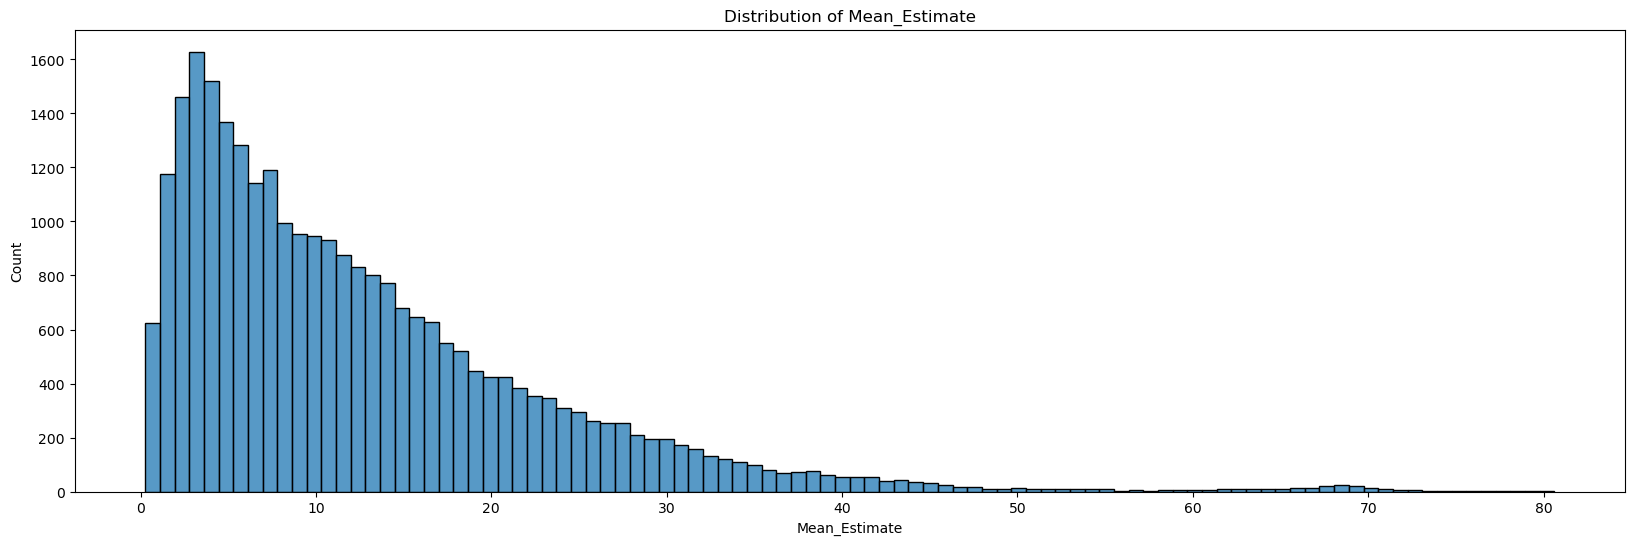

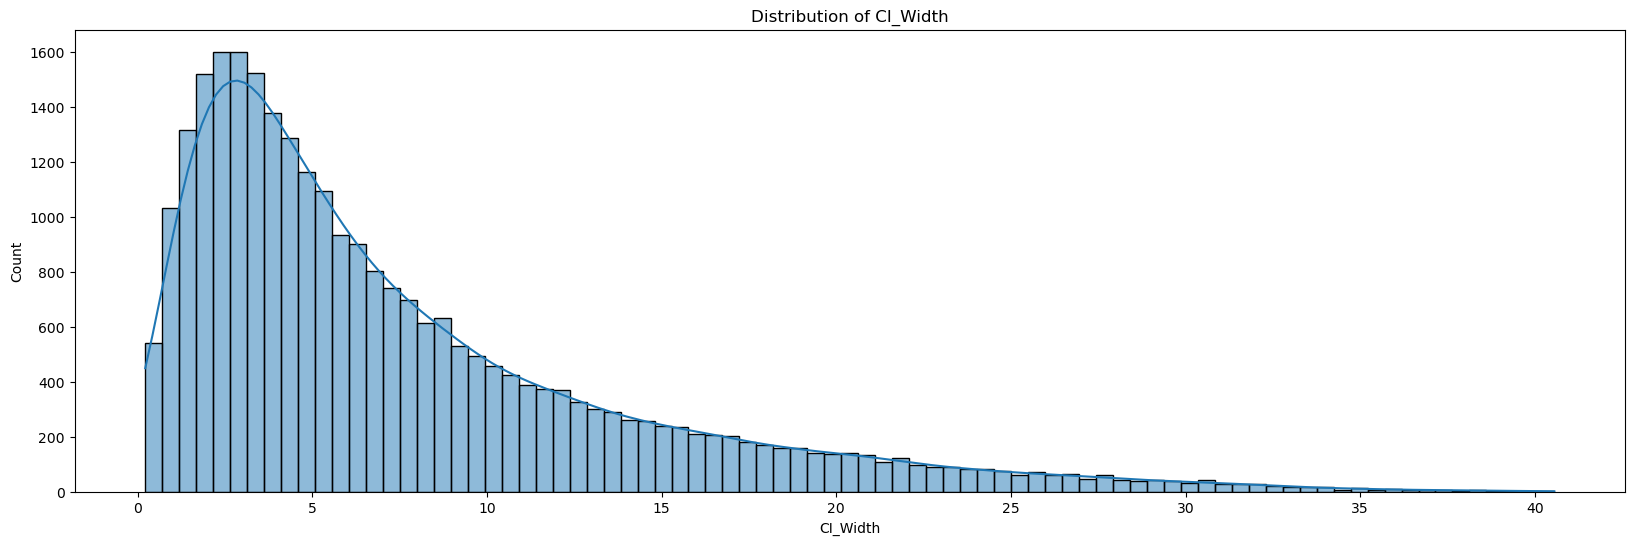

In [422]:
# Check distribution for Mean_Estimate
plt.figure(figsize = (20,6))
sns.histplot(flt_df_obesity['Mean_Estimate'], kde=False)
plt.title('Distribution of Mean_Estimate')
plt.show()

# Check distribution for CI_Width
plt.figure(figsize = (20,6))
sns.histplot(flt_df_obesity['CI_Width'], kde=True)
plt.title('Distribution of CI_Width')
plt.show()

## Trend of obisity_level over years

C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\3407036698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_df_obesity['Year'] = flt_df_obesity['Year'].astype(int)
C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\3407036698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_df_obesity['obesity_level'] = flt_df_obesity['obesity_level'].astype(str)
C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\3407036698.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made

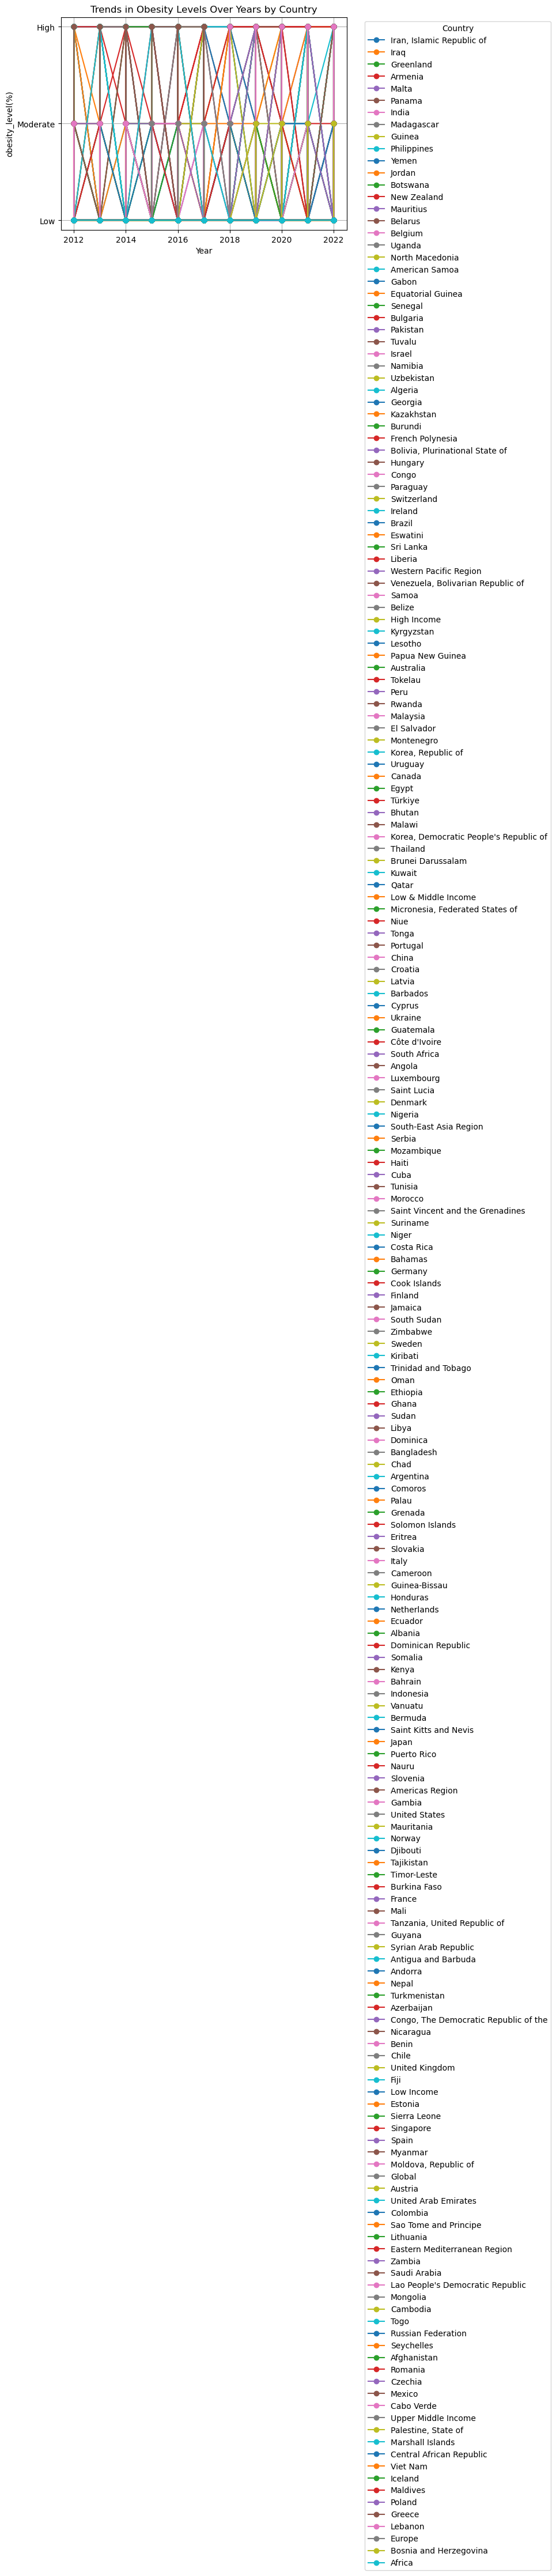

In [424]:
# Ensure correct types
flt_df_obesity['Year'] = flt_df_obesity['Year'].astype(int)
flt_df_obesity['obesity_level'] = flt_df_obesity['obesity_level'].astype(str)

# Plotting
# plt.figure(figsize=(10, 6))

# Plot trend line for each country
for country in flt_df_obesity['Country'].unique():
    country_data = flt_df_obesity[flt_df_obesity['Country'] == country].sort_values('Year')
    plt.plot(country_data['Year'], country_data['obesity_level'], marker='o', label=country)

# Add titles and labels
plt.title("Trends in Obesity Levels Over Years by Country")
plt.xlabel("Year")
plt.ylabel("obesity_level(%)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Trend of malnutrition_level over years

C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\1121346915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_df_malnutrition['Year'] = flt_df_malnutrition['Year'].astype(int)
C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\1121346915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_df_malnutrition['malnutrition_level'] = flt_df_malnutrition['malnutrition_level'].astype(str)
C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\1121346915.py:19: UserWarning: Tight layout not applied. The bottom 

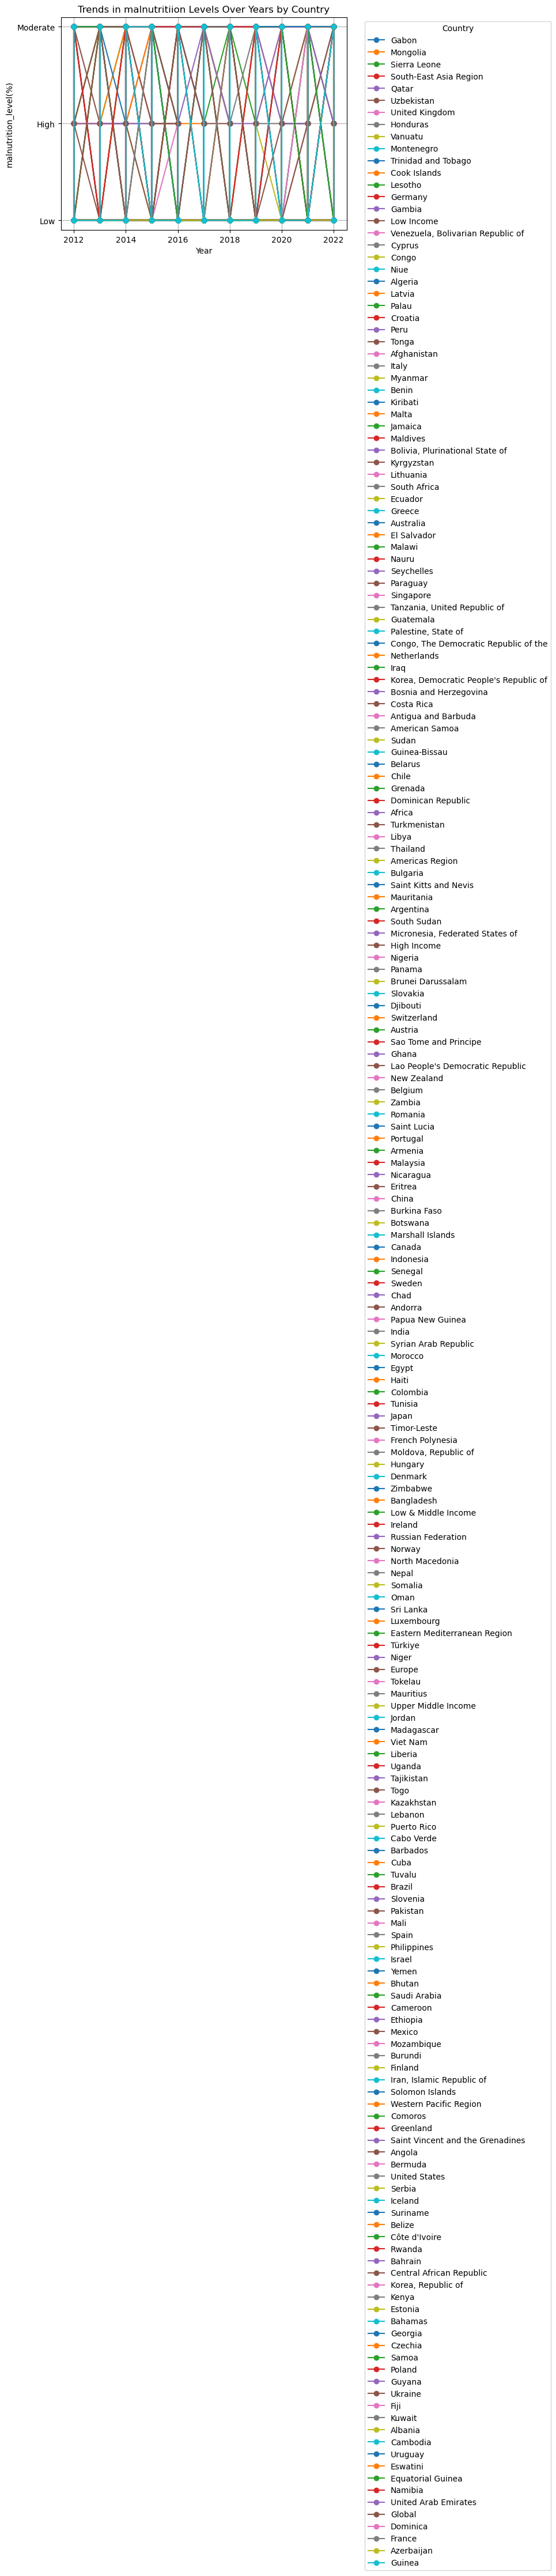

In [426]:
# Ensure correct types
flt_df_malnutrition['Year'] = flt_df_malnutrition['Year'].astype(int)
flt_df_malnutrition['malnutrition_level'] = flt_df_malnutrition['malnutrition_level'].astype(str)

# Plotting
# plt.figure(figsize=(10, 6))

# Plot trend line for each country
for country in flt_df_malnutrition['Country'].unique():
    country_data = flt_df_malnutrition[flt_df_malnutrition['Country'] == country].sort_values('Year')
    plt.plot(country_data['Year'], country_data['malnutrition_level'], marker='o', label=country)

# Add titles and labels
plt.title("Trends in malnutritiion Levels Over Years by Country")
plt.xlabel("Year")
plt.ylabel("malnutrition_level(%)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## 1.Trend of Obisity_level in India

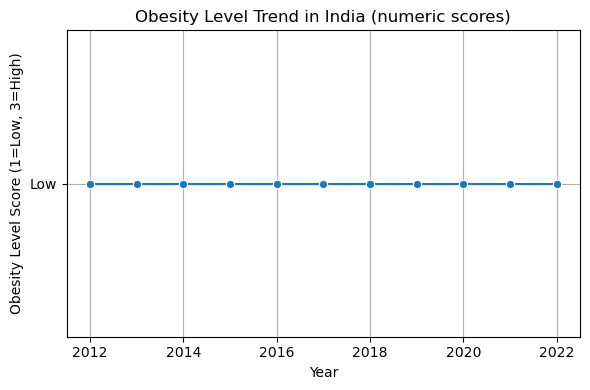

In [428]:
india_df = flt_df_obesity[flt_df_obesity['Country']== 'India'].copy()

# Map categorical obesity_level to numeric scores
obesity_level = {'Low': 1, 'Moderate': 2, 'High': 3}


# Sort by year
india_df = india_df.sort_values('Year')
plt.figure(figsize=(6,4))
sns.lineplot(data = india_df,  x="Year", y="obesity_level", marker = 'o')


#plot the numeric trend


plt.title("Obesity Level Trend in India (numeric scores)")
plt.xlabel("Year")
plt.ylabel("Obesity Level Score (1=Low, 3=High)")
plt.grid(True)
plt.tight_layout()
plt.show()

## 2. Top 5 Countries by "High" Obesity Level Frequency

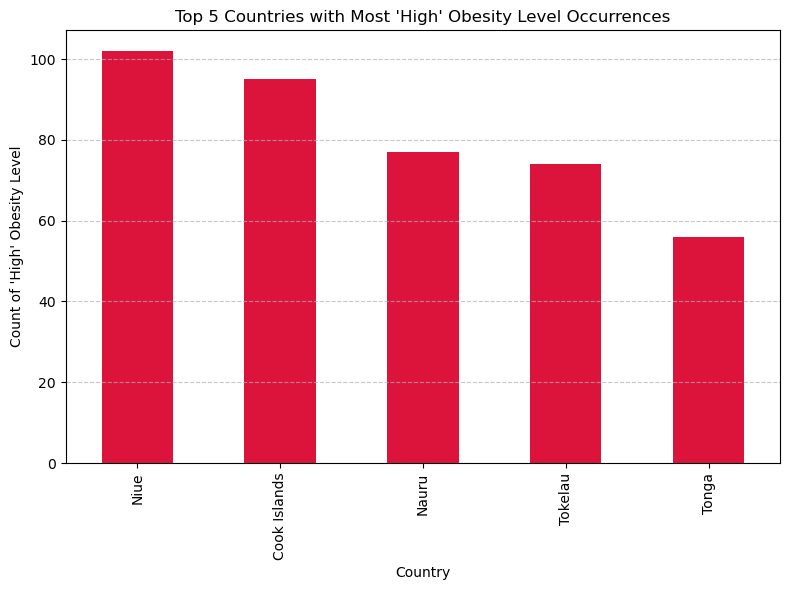

In [430]:
# Filter rows where obesity_level is 'High'
high_df = flt_df_obesity[flt_df_obesity['obesity_level'].str.lower() == 'high']

# Count how many times each country had 'High' obesity level
high_counts = high_df['Country'].value_counts().head(5)

# Plot bar chart
plt.figure(figsize=(8, 6))
high_counts.plot(kind='bar', color='crimson')
plt.title("Top 5 Countries with Most 'High' Obesity Level Occurrences")
plt.xlabel("Country")
plt.ylabel("Count of 'High' Obesity Level")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 3. Trend of Childern's obesity level

C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\4155579415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_df_obesity['level_score'] = flt_df_obesity['obesity_level'].map(level_map)
C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\4155579415.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_df_obesity['Year'] = flt_df_obesity['Year'].astype(int)


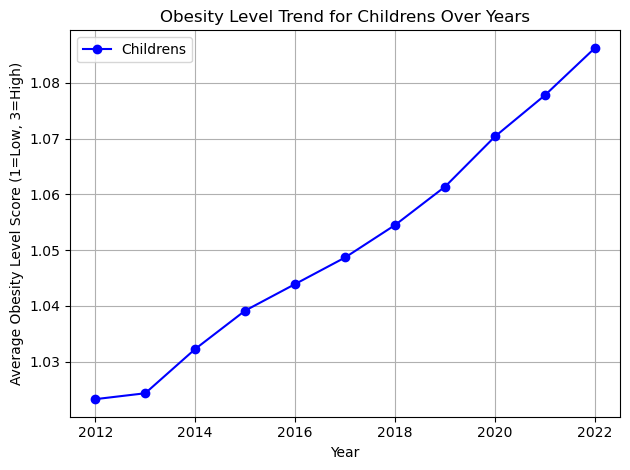

In [432]:
level_map = {'Low': 1, 'Moderate': 2, 'High': 3}
flt_df_obesity['level_score'] = flt_df_obesity['obesity_level'].map(level_map)


# Ensure correct data types
flt_df_obesity['Year'] = flt_df_obesity['Year'].astype(int)

# Choose age group: 'Child' or 'Adult'
age_group_filter = 'Children'

# Filter for the selected age group
age_df = flt_df_obesity[flt_df_obesity['age_group'] == age_group_filter]

# Group by year and calculate mean level score
trend_df = age_df.groupby('Year')['level_score'].mean().reset_index()

# Determine overall trend
first = trend_df['level_score'].iloc[0]
last = trend_df['level_score'].iloc[-1]

if last > first:
    trend = "Increasing"
elif last < first:
    trend = "Decreasing"
else:
    trend = "Stable"

#plt.figure(figsize=(8, 5))
plt.plot(trend_df['Year'], trend_df['level_score'], marker='o', color='blue', label=f'{age_group_filter}s')
plt.title(f"Obesity Level Trend for {age_group_filter}s Over Years")
plt.xlabel("Year")
plt.ylabel("Average Obesity Level Score (1=Low, 3=High)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 4. Box plot to identify the distribution of Malnutrition across region in Africa

C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\3258222441.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Region", y="Mean_Estimate", data=flt_df_malnutrition, palette='Set2')


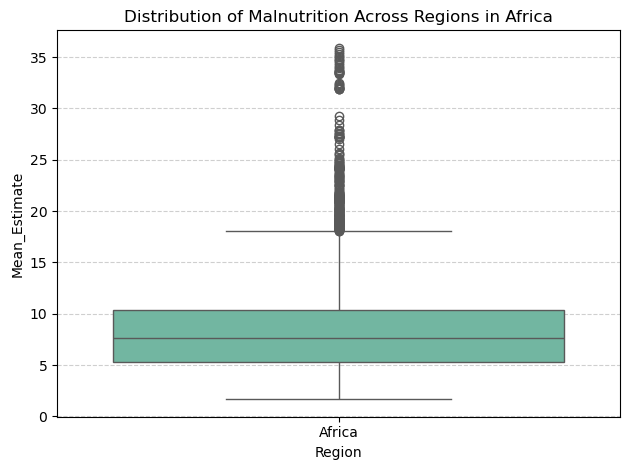

In [434]:
# Filter for a specific country 
region_filter = 'Africa'
flt_df_malnutrition = flt_df_malnutrition[flt_df_malnutrition['Region'] == region_filter]

#plt.figure(figsize=(200, 20))
sns.boxplot(x="Region", y="Mean_Estimate", data=flt_df_malnutrition, palette='Set2')

plt.title(f"Distribution of Malnutrition Across Regions in {region_filter}")
plt.xlabel("Region")
plt.ylabel("Mean_Estimate")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [219]:
print(type(flt_df_malnutrition))

<class 'pandas.core.frame.DataFrame'>


## 5. Trend of Malnutrition over Adults 

C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\14576748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_df_malnutrition['level_score'] = flt_df_malnutrition['malnutrition_level'].map(level_map)
C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\14576748.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_df_malnutrition['Year'] = flt_df_malnutrition['Year'].astype(int)


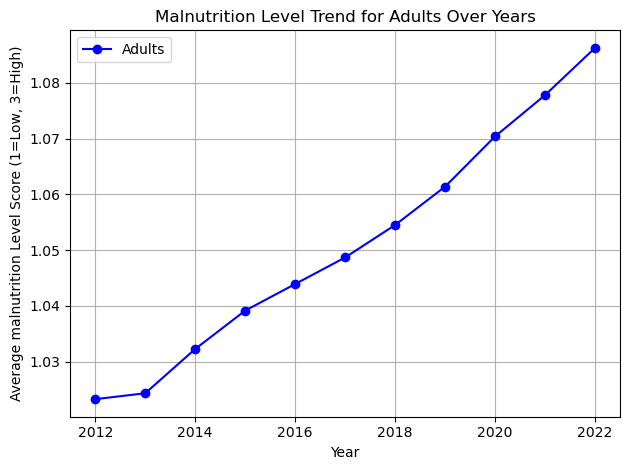

In [436]:
level_map = {'Low': 1, 'Moderate': 2, 'High': 3}
flt_df_malnutrition['level_score'] = flt_df_malnutrition['malnutrition_level'].map(level_map)


# Ensure correct data types
flt_df_malnutrition['Year'] = flt_df_malnutrition['Year'].astype(int)

# Choose age group: 'Child' or 'Adult'
age_group_filter = 'Adult'

# Filter for the selected age group
flt_df_malnutrition[flt_df_malnutrition['age_group'] == age_group_filter]

# Group by year and calculate mean level score
trend_df = age_df.groupby('Year')['level_score'].mean().reset_index()

# Determine overall trend
first = trend_df['level_score'].iloc[0]
last = trend_df['level_score'].iloc[-1]

if last > first:
    trend = "Increasing"
elif last < first:
    trend = "Decreasing"
else:
    trend = "Stable"

#plt.figure(figsize=(8, 5))
plt.plot(trend_df['Year'], trend_df['level_score'], marker='o', color='blue', label=f'{age_group_filter}s')
plt.title(f"Malnutrition Level Trend for {age_group_filter}s Over Years")
plt.xlabel("Year")
plt.ylabel("Average malnutrition Level Score (1=Low, 3=High)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 6. Gender-based distribution analysis in Malnutrition

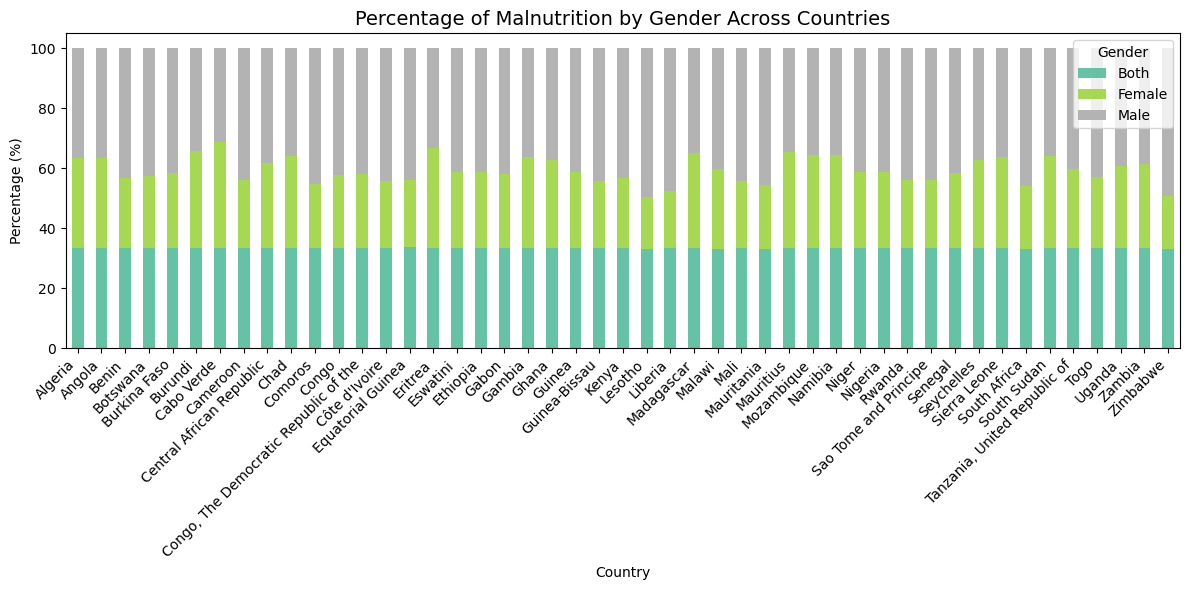

In [438]:
# Group by Country and Gender, summing Mean_Estimate
gender_country = flt_df_malnutrition.groupby(['Country', 'Gender'])['Mean_Estimate'].sum().reset_index()

# Get total malnutrition per country (all genders)
total_by_country = gender_country.groupby('Country')['Mean_Estimate'].sum().reset_index()
total_by_country.rename(columns={'Mean_Estimate': 'Total'}, inplace=True)

# Merge to calculate percentage
merged = pd.merge(gender_country, total_by_country, on='Country')
merged['Percentage'] = (merged['Mean_Estimate'] / merged['Total']) * 100

# Pivot table to make it easier to read
pivot = merged.pivot(index='Country', columns='Gender', values='Percentage').fillna(0)

# Plotting the pivot table as a stacked bar chart
pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

# Add labels and title
plt.title('Percentage of Malnutrition by Gender Across Countries', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Percentage (%)')
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [225]:
print(flt_df_malnutrition['Country'].value_counts())

Country
Gabon                                    132
Mozambique                               132
Mauritius                                132
Madagascar                               132
Liberia                                  132
Uganda                                   132
Togo                                     132
Cabo Verde                               132
Mali                                     132
Cameroon                                 132
Ethiopia                                 132
Burundi                                  132
Zimbabwe                                 132
Comoros                                  132
Angola                                   132
Côte d'Ivoire                            132
Rwanda                                   132
Central African Republic                 132
Kenya                                    132
Eswatini                                 132
Equatorial Guinea                        132
Namibia                                  132
Ni

## Relationship between CI_Width and Mean_Estimate (Malnutrition & Obesity)

C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\819976515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_df_malnutrition['CI_Width'] = flt_df_malnutrition['CI_Width'].astype(float)
C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\819976515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_df_malnutrition['UpperBound'] = flt_df_malnutrition['UpperBound'].astype(float)
C:\Users\aziz9\AppData\Local\Temp\ipykernel_18368\819976515.py:4: SettingWithCopyWarning: 
A value is trying to be set on a 

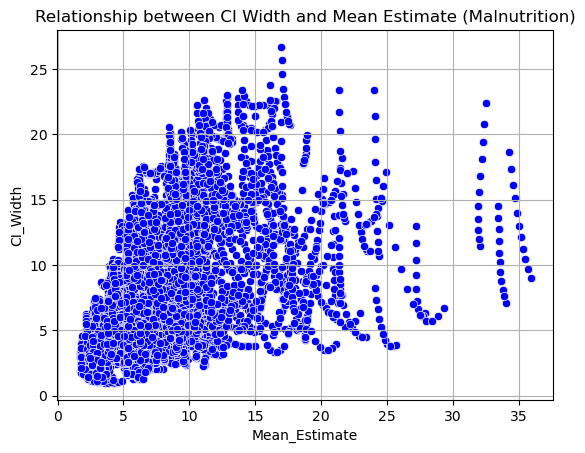

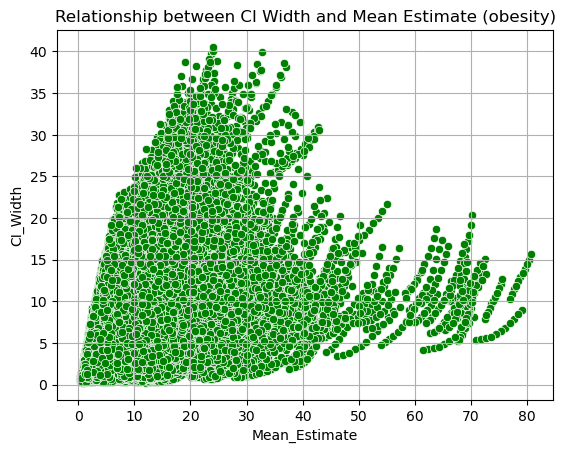

In [440]:
# Ensure correct data types
flt_df_malnutrition['CI_Width'] = flt_df_malnutrition['CI_Width'].astype(float)
flt_df_malnutrition['UpperBound'] = flt_df_malnutrition['UpperBound'].astype(float)
flt_df_malnutrition['LowerBound'] = flt_df_malnutrition['LowerBound'].astype(float)
flt_df_malnutrition['Mean_Estimate'] = flt_df_malnutrition['Mean_Estimate'].astype(float)

flt_df_obesity['CI_Width'] = flt_df_obesity['CI_Width'].astype(float)
flt_df_obesity['UpperBound'] = flt_df_obesity['UpperBound'].astype(float)
flt_df_obesity['LowerBound'] = flt_df_obesity['LowerBound'].astype(float)
flt_df_obesity['Mean_Estimate'] = flt_df_obesity['Mean_Estimate'].astype(float)

sns.scatterplot(x='Mean_Estimate', y='CI_Width', data=flt_df_malnutrition, color='blue')
plt.xlabel('Mean_Estimate')
plt.ylabel('CI_Width')
plt.title('Relationship between CI Width and Mean Estimate (Malnutrition)')
plt.grid(True)
plt.show()

sns.scatterplot(x='Mean_Estimate', y='CI_Width', data=flt_df_obesity, color='green')
plt.xlabel('Mean_Estimate')
plt.ylabel('CI_Width')
plt.title('Relationship between CI Width and Mean Estimate (obesity)')
plt.grid(True)
plt.show()

# Establish a connection using Python

In [442]:
import pymysql    

connection = pymysql.connect(
    host = "localhost",
    user = 'root',
    password = "Wonder*555", 
    database = "nutrition" 
)

In [444]:
cursor = connection.cursor()

In [446]:
#obesity table creation in SQL

cursor.execute("""create table if not exists obesity(Year INT, Gender VARCHAR(100), Mean_Estimate FLOAT, LowerBound FLOAT, UpperBound FLOAT, age_group VARCHAR(100), Country VARCHAR(100), Region VARCHAR(100), CI_Width FLOAT, obesity_level VARCHAR(100))
""")

0

In [448]:
insert = """insert into Obesity(Year, Gender, Mean_Estimate, LowerBound, UpperBound, Age_Group, Country, Region, CI_Width, obesity_level)values(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"""

for index, row in flt_df_obesity.iterrows():
    values = (
        row['Year'],
        row['Gender'],
        row['Mean_Estimate'],
        row['LowerBound'],
        row['UpperBound'],
        row['age_group'],
        row['Country'],
        row['Region'],
        row['CI_Width'],
        row['obesity_level']
    )
    cursor.execute(insert, values)

connection.commit()

In [2264]:
#malnutrition table creation in SQL

cursor.execute("""create table if not exists Malnutrition(Year INT, Gender VARCHAR(100), Mean_Estimate FLOAT, LowerBound FLOAT, UpperBound FLOAT, age_group VARCHAR(100), Country VARCHAR(100), Region VARCHAR(100), CI_Width FLOAT, malnutrition_Level VARCHAR(100))
""")

0

In [2268]:
insert = """insert into Malnutrition(Year, Gender, Mean_Estimate, LowerBound, UpperBound, age_group, Country, Region, CI_Width, malnutrition_Level)values(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"""

for index, row in flt_df_malnutrition.iterrows():
    values = (
        row['Year'],
        row['Gender'],
        row['Mean_Estimate'],
        row['LowerBound'],
        row['UpperBound'],
        row['age_group'],
        row['Country'],
        row['Region'],
        row['CI_Width'],
        row['malnutrition_level']
    )
    cursor.execute(insert, values)

connection.commit()

In [2150]:
cursor.execute('select * from malnutrition')
result = cursor.fetchall()
data = pd.DataFrame(result, columns = [i[0] for i in cursor.description])
data.head()

Year  Gender  Mean_Estimate  LowerBound  UpperBound age_group  \
0  2021  Female        5.79511     3.97204     8.07702    Adults   
1  2016  Female        8.37172     6.65567    10.25310    Adults   
2  2012    Male       12.08960     9.45811    14.89630    Adults   
3  2018    Both       12.27350     9.45368    15.47580    Adults   
4  2017    Both        7.19612     5.48162     9.09319    Adults   

        Country  Region  CI_Width malnutrition_Level  
0         Gabon  Africa   4.10498                Low  
1  Sierra Leone  Africa   3.59745                Low  
2       Lesotho  Africa   5.43817           Moderate  
3        Gambia  Africa   6.02215           Moderate  
4       Lesotho  Africa   3.61157                Low

In [2270]:
flt_df_malnutrition['Region'].value_counts()

Region
Europe                   6864
Africa                   6204
Americas                 4884
Western Pacific          3960
Eastern Mediterranean    2904
non_ISO                  1452
South-East Asia          1452
Name: count, dtype: int64

In [2272]:
flt_df_obesity['Region'].value_counts()

Region
Europe                   6864
Africa                   6204
Americas                 4884
Western Pacific          3960
Eastern Mediterranean    2904
South-East Asia          1452
non-ISO                  1452
Name: count, dtype: int64